# Data Analysis Salaries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [407]:
from sklearn import linear_model

In [792]:
plt.style.use("ggplot")

In [793]:
df = pd.read_csv("salaries.csv")

In [794]:
reg_data = df.copy()

In [795]:
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [796]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

In [797]:
df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
count,6.264200e+04,62642.000000,62642.000000,6.264200e+04,6.264200e+04,62642.000000,62642.000000,62640.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000
mean,2.163004e+05,7.204135,2.702093,1.366873e+05,5.148608e+04,19334.746588,9856.201989,616.097222,41694.723732,0.245698,0.201223,0.028783,0.005108,0.005667,0.187925,0.128221,0.012835,0.011015,0.018039
std,1.380337e+05,5.840375,3.263656,6.136928e+04,8.187457e+04,26781.292040,6679.104563,289.843390,24488.865879,0.430504,0.400917,0.167196,0.071291,0.075067,0.390655,0.334338,0.112562,0.104373,0.133094
min,1.000000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,3.000000,0.000000,1.080000e+05,0.000000e+00,1000.000000,7369.000000,506.000000,20069.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.880000e+05,6.000000,2.000000,1.400000e+05,2.500000e+04,14000.000000,7839.000000,807.000000,42019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.640000e+05,10.000000,4.000000,1.700000e+05,6.500000e+04,26000.000000,11521.000000,807.000000,63021.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.980000e+06,69.000000,69.000000,1.659870e+06,2.800000e+06,1000000.000000,47926.000000,881.000000,83875.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [798]:
df.shape

(62642, 29)

## Data Cleaning

In [799]:
df.loc[df.gender == "Title: Senior Software Engineer"]

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
11010,9/17/2019 6:23:02,GitHub,E4,Software Engineer,205000,"Buda, TX",15.0,4.0,Distributed Systems (Back-End),177000.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [802]:
df.drop(df.loc[df.gender == "Title: Senior Software Engineer"].index, inplace = True)

## Missing Values

In [804]:
missing_dmaid = df[df.dmaid.isna()].index

In [805]:
df.drop(missing_dmaid, inplace = True)

In [806]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62638 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62638 non-null  object 
 1   company                  62633 non-null  object 
 2   level                    62519 non-null  object 
 3   title                    62638 non-null  object 
 4   totalyearlycompensation  62638 non-null  int64  
 5   location                 62638 non-null  object 
 6   yearsofexperience        62638 non-null  float64
 7   yearsatcompany           62638 non-null  float64
 8   tag                      61784 non-null  object 
 9   basesalary               62638 non-null  float64
 10  stockgrantvalue          62638 non-null  float64
 11  bonus                    62638 non-null  float64
 12  gender                   43099 non-null  object 
 13  otherdetails             40135 non-null  object 
 14  cityid                

In [807]:
df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

In [808]:
df.drop(labels = ['rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic'], axis = 1, inplace = True)

In [809]:
df.drop(labels = ["otherdetails", "dmaid"], axis = 1, inplace = True)

In [810]:
drop_tag = df[df.tag.isna()].index

In [811]:
df.drop(drop_tag, inplace = True)

In [812]:
df.reset_index(drop = True, inplace = True)

In [813]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61784 entries, 0 to 61783
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                61784 non-null  object 
 1   company                  61780 non-null  object 
 2   level                    61667 non-null  object 
 3   title                    61784 non-null  object 
 4   totalyearlycompensation  61784 non-null  int64  
 5   location                 61784 non-null  object 
 6   yearsofexperience        61784 non-null  float64
 7   yearsatcompany           61784 non-null  float64
 8   tag                      61784 non-null  object 
 9   basesalary               61784 non-null  float64
 10  stockgrantvalue          61784 non-null  float64
 11  bonus                    61784 non-null  float64
 12  gender                   42752 non-null  object 
 13  cityid                   61784 non-null  int64  
 14  Race                  

### Create copy of df

In [814]:
top10 = df.copy()

In [815]:
top10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61784 entries, 0 to 61783
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                61784 non-null  object 
 1   company                  61780 non-null  object 
 2   level                    61667 non-null  object 
 3   title                    61784 non-null  object 
 4   totalyearlycompensation  61784 non-null  int64  
 5   location                 61784 non-null  object 
 6   yearsofexperience        61784 non-null  float64
 7   yearsatcompany           61784 non-null  float64
 8   tag                      61784 non-null  object 
 9   basesalary               61784 non-null  float64
 10  stockgrantvalue          61784 non-null  float64
 11  bonus                    61784 non-null  float64
 12  gender                   42752 non-null  object 
 13  cityid                   61784 non-null  int64  
 14  Race                  

## Descriptive Analysis

In [816]:
top10.shape

(61784, 16)

In [817]:
print(f"Average total yearly compensation: ${round(top10.totalyearlycompensation.mean(), 2)}")
print(f"Average base salary: ${round(top10.basesalary.mean(), 2)}")
print(f"Average years of experience: {round(top10.yearsofexperience.mean(), 2)} years")

Average total yearly compensation: $215782.32
Average base salary: $136676.21
Average years of experience: 7.2 years


In [684]:
top10.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

### Categorical Variables

In [685]:
len(top10.company.unique())

1632

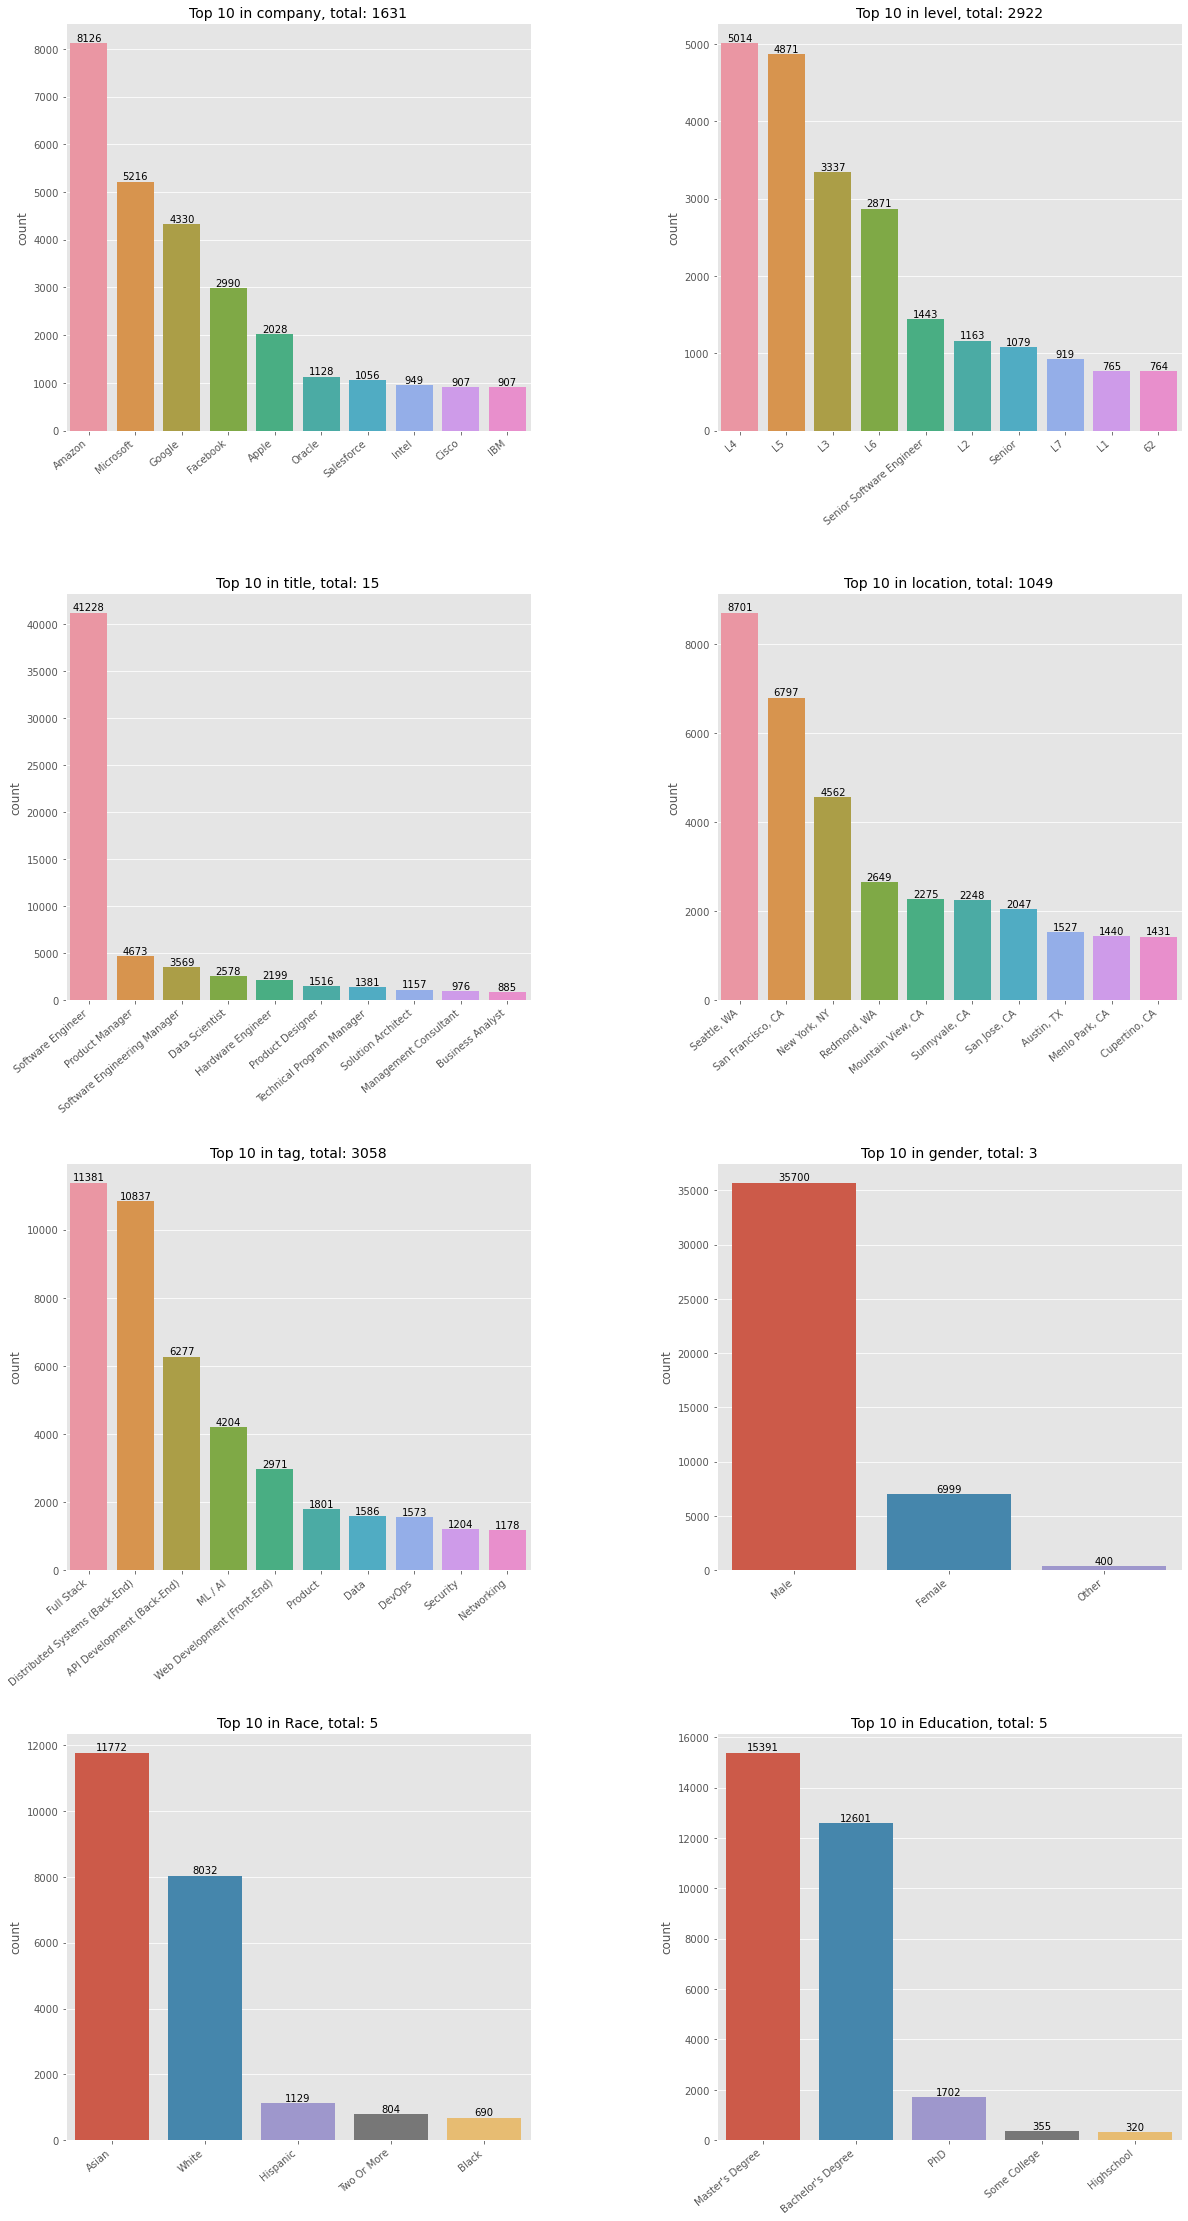

In [707]:
cat_cols = ['company', 'level', 'title', 'location', 'tag', 'gender', 'Race', 'Education']

fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize = (20,30))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.4, wspace=0.4)

row = 0
col = 0

for i in cat_cols:
    sns.countplot(data = top10, x = i, 
                 order = top10[i].value_counts().index[:10],
                 ax = ax[row][col])
    #ax[row][col].tick_params(ha = "right", labelrotation = 45)
    ax[row][col].set_xticklabels(top10[i].value_counts().index[:10], rotation=40, ha="right")
    ax[row][col].set_title(f"Top 10 in {i}, total: {len(top10[i].dropna().unique())}", fontsize = 14)
    ax[row][col].set_xlabel("")
    ax[row][col].bar_label(ax[row][col].containers[0], label_type='edge')
                                            
    if col == 1:
        row +=1
        col = 0
    else:
        col += 1
        
plt.savefig('cat_dist_df.png')
plt.show()

### Inference Categorical  Variables

**Company**:

- The top 10 biggest employers in are big tech companies with Amazon in top

**Level**:

- Does not really say much, since most companies use different names for different levels

**Title**:

- The vast majority in the data set works as software engineers

**Location**:

- Dataset consist of Americans, where the top three citys in terms of number of employees working there are Seattle, San Fransisco and New York

**Tag**:

- Some different tags, full stack and different types of back end are the most common

**Gender**:

- Heavily overpopulated by men

**Race**:

- A vast majority are asian and white

**Education**:
- Most employees have either a masters or bachelors degree


In [722]:
top10.shape

(62638, 29)

### Numerical Variables

In [688]:
top10.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

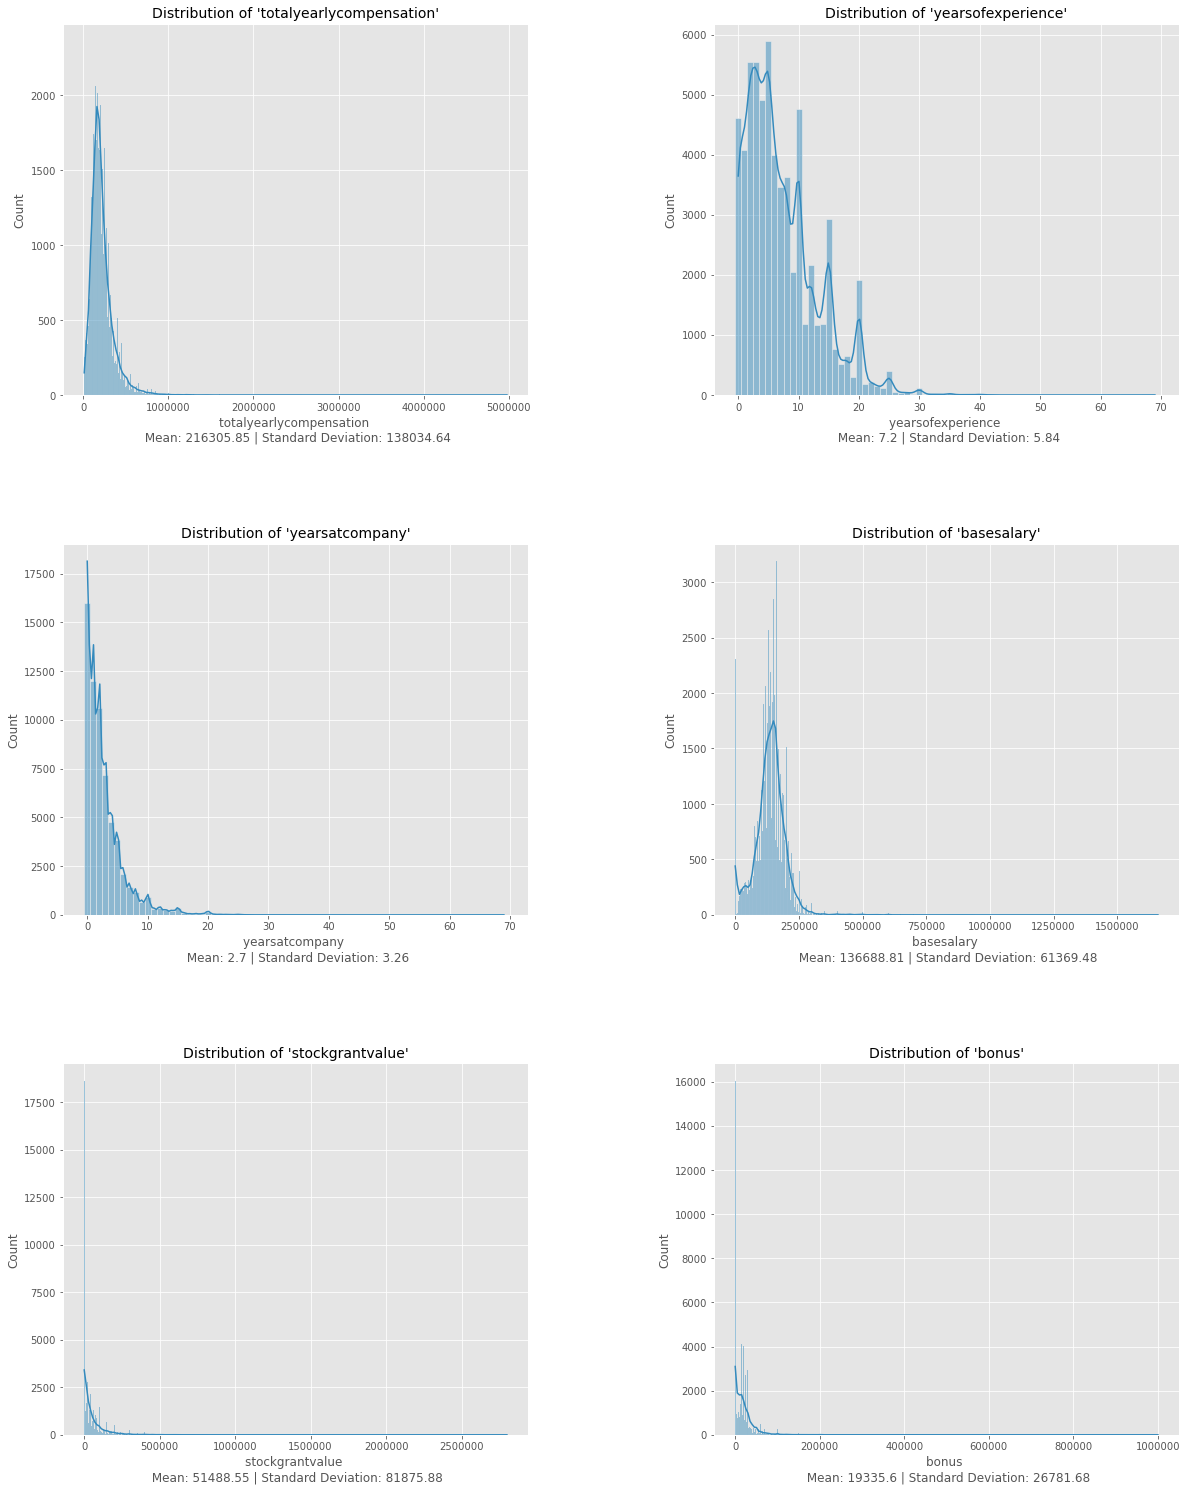

In [728]:
num_cols = ['totalyearlycompensation', 'yearsofexperience', 'yearsatcompany', 'basesalary',
       'stockgrantvalue', 'bonus']

disc_cols = ['yearsofexperience', 'yearsatcompany']

fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (20,20))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.4, wspace=0.4)

row = 0
col = 0

for i in num_cols:
    if i not in disc_cols:
        sns.histplot(data = top10, x = i, 
                     kde = True,
                     ax = ax[row][col])
        ax[row][col].set_title(f"Distribution of '{i}'", fontsize = 14)
        ax[row][col].ticklabel_format(style = "plain")
        ax[row][col].set_xlabel(f"{i} \n Mean: {round(np.mean(top10[i]),2)} | Standard Deviation: {round(np.std(top10[i]),2)}")
        if col == 1:
            row +=1
            col = 0
        else:
            col += 1
    else:
        sns.histplot(data = top10, x = i, 
                     kde = True,
                     discrete = True,
                     ax = ax[row][col])
        ax[row][col].set_title(f"Distribution of '{i}'", fontsize = 14)
        ax[row][col].ticklabel_format(style = "plain")
        ax[row][col].set_xlabel(f"{i} \n Mean: {round(np.mean(top10[i]),2)} | Standard Deviation: {round(np.std(top10[i]),2)}")
        if col == 1:
            row +=1
            col = 0
        else:
            col += 1
        
        
plt.show()

### Inference Numerical Variables

**Total Yearly Compensation**

- Heavily right skewed, some people are getting crazy high salaries compared to the rest of the population

**Years of experience**

- Peaking around 5 years, right skewed

**Years at company**

- Same pattern as experience, however peaking at 0/1 year

**Base salary**

- Follow the same pattern as total yearly, but a little less skewed.

**Stock grant value**
 
- Very right skewed, most people have 0 stock grant and some have very high levels

**Bonus**

- Very similar to stock grant, this explains the differences in skewness between yearly comp and base salary

## Bivariate Analysis



In [194]:
top10.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'cityid', 'Race', 'Education'],
      dtype='object')

### Correlation Matrix

In [664]:
top10corr = top10.corr()

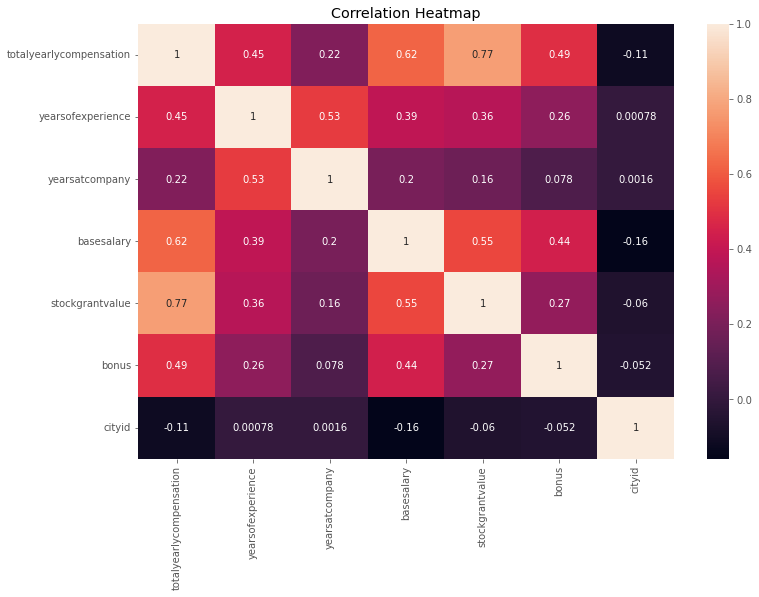

In [692]:
fig, ax = plt.subplots(figsize = (12,8))

sns.heatmap(data = top10corr, annot = True)
ax.set_title("Correlation Heatmap")

plt.show()

### Average Compensation by Categorical Variables

#### Average Yearly Compensation

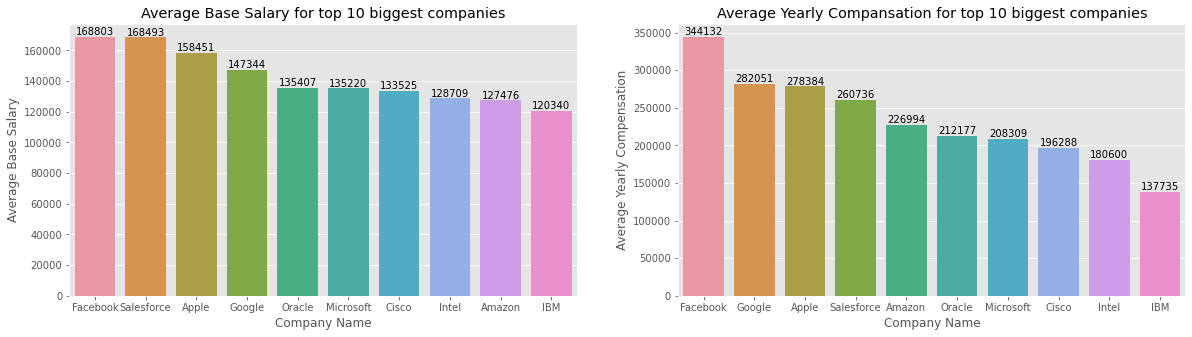

In [306]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

sns.barplot(data = top10, x = "company", y = "basesalary", ax = ax[0], ci = None,
           order = top10.groupby("company")["basesalary"].mean().sort_values(ascending = False).index)
ax[0].set_title("Average Base Salary for top 10 biggest companies")
ax[0].set_ylabel("Average Base Salary")
ax[0].set_xlabel("Company Name")
ax[0].bar_label(ax[0].containers[0], label_type='edge')


sns.barplot(data = top10, x = "company", y = "totalyearlycompensation", ax = ax[1], ci = None,
           order = top10.groupby("company")["totalyearlycompensation"].mean().sort_values(ascending = False).index)
ax[1].set_title("Average Yearly Compansation for top 10 biggest companies")
ax[1].set_ylabel("Average Yearly Compensation")
ax[1].set_xlabel("Company Name")
ax[1].bar_label(ax[1].containers[0], label_type='edge')


plt.show()

#### Average Yearly Compensation and Base Salary for Title

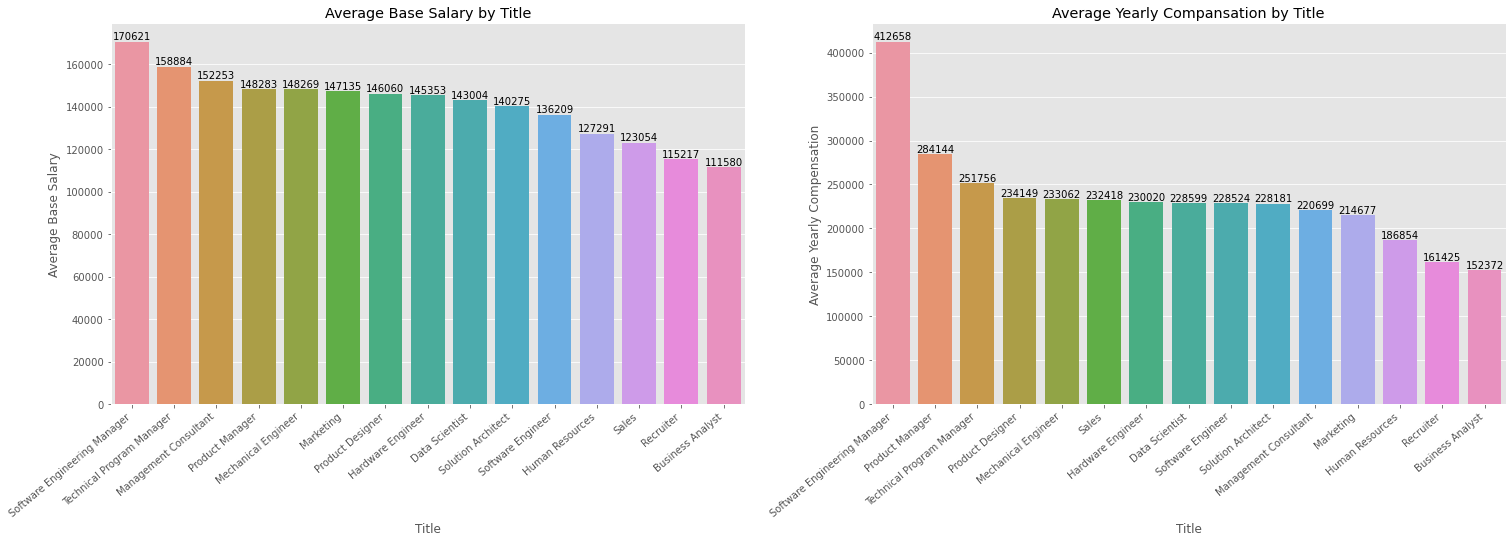

In [309]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (25,7))

sns.barplot(data = top10, x = "title", y = "basesalary", ax = ax[0], ci = None,
           order = top10.groupby("title")["basesalary"].mean().sort_values(ascending = False).index)
ax[0].set_title("Average Base Salary by Title")
ax[0].set_ylabel("Average Base Salary")
ax[0].set_xlabel("Title")
ax[0].set_xticklabels(top10.groupby("title")["basesalary"].mean().sort_values(ascending = False).index,
                   rotation=40, ha="right")
ax[0].bar_label(ax[0].containers[0], label_type='edge')


sns.barplot(data = top10, x = "title", y = "totalyearlycompensation", ax = ax[1], ci = None,
           order = top10.groupby("title")["totalyearlycompensation"].mean().sort_values(ascending = False).index)
ax[1].set_title("Average Yearly Compansation by Title")
ax[1].set_ylabel("Average Yearly Compensation")
ax[1].set_xlabel("Title")
ax[1].set_xticklabels(top10.groupby("title")["totalyearlycompensation"].mean().sort_values(ascending = False).index,
                   rotation=40, ha="right")
ax[1].bar_label(ax[1].containers[0], label_type='edge')
    
plt.show()

In [216]:
df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'cityid', 'Race', 'Education'],
      dtype='object')

#### Average Stock Grant and Bonus by Company and Title

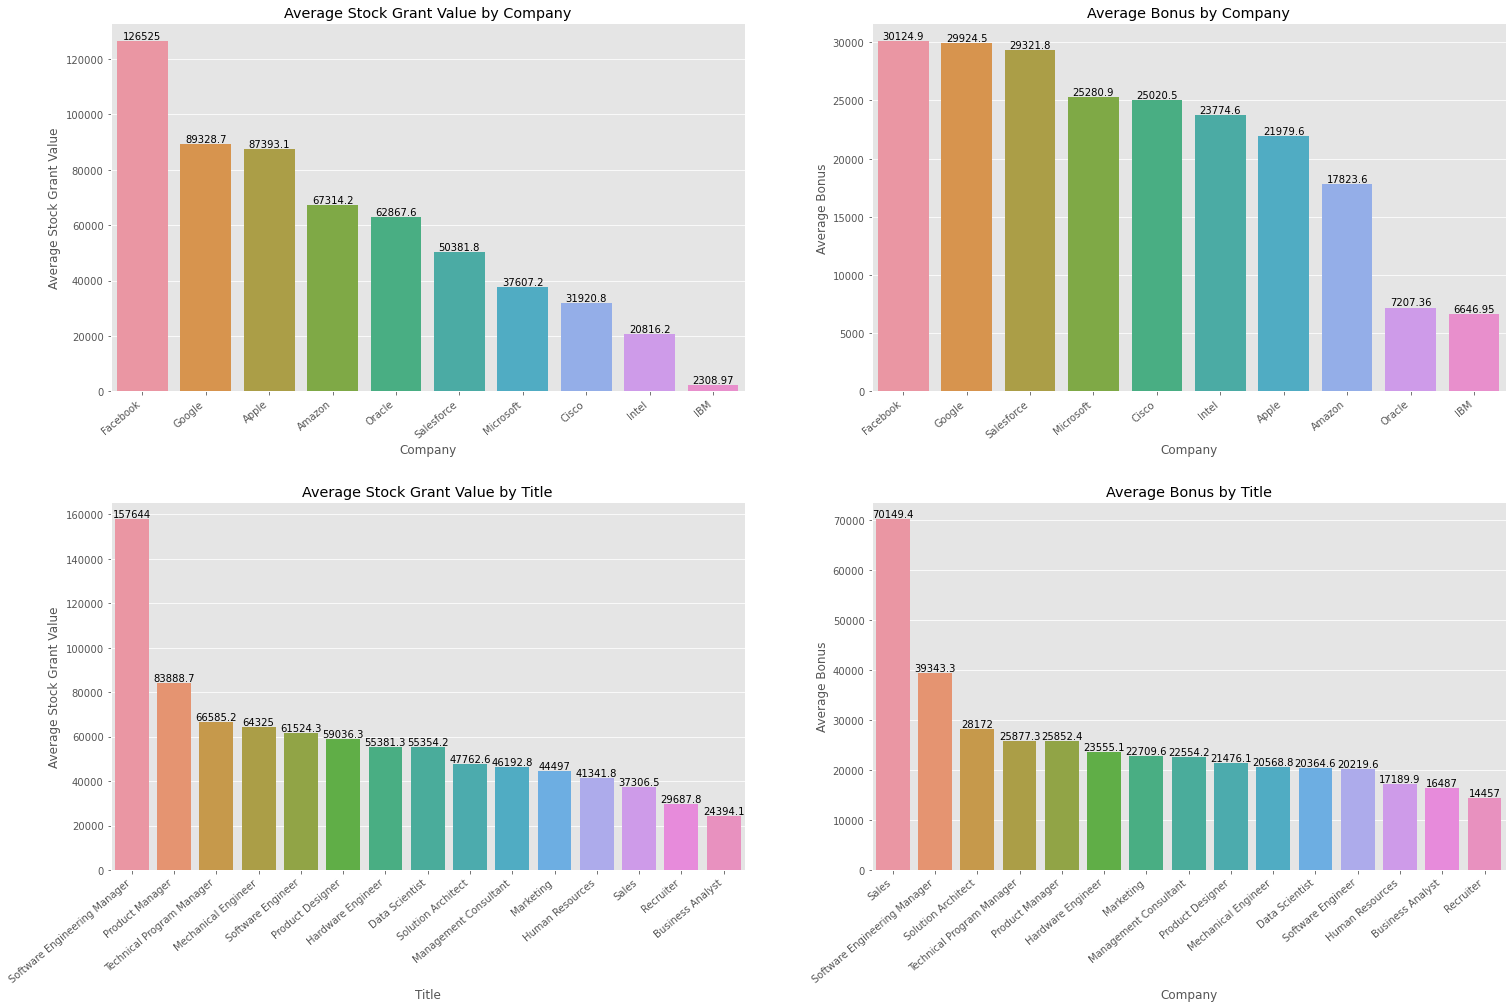

In [311]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (25,12))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.3, wspace=0.2)

sns.barplot(data = top10, x = "company", y = "stockgrantvalue", ax = ax[0][0], ci = None,
           order = top10.groupby("company")["stockgrantvalue"].mean().sort_values(ascending = False).index)
ax[0][0].set_title("Average Stock Grant Value by Company")
ax[0][0].set_ylabel("Average Stock Grant Value")
ax[0][0].set_xlabel("Company")
ax[0][0].set_xticklabels(top10.groupby("company")["stockgrantvalue"].mean().sort_values(ascending = False).index,
                   rotation=40, ha="right")
ax[0][0].bar_label(ax[0][0].containers[0], label_type='edge')


sns.barplot(data = top10, x = "company", y = "bonus", ax = ax[0][1], ci = None,
           order = top10.groupby("company")["bonus"].mean().sort_values(ascending = False).index)
ax[0][1].set_title("Average Bonus by Company")
ax[0][1].set_ylabel("Average Bonus")
ax[0][1].set_xlabel("Company")
ax[0][1].set_xticklabels(top10.groupby("company")["bonus"].mean().sort_values(ascending = False).index,
                   rotation=40, ha="right")
ax[0][1].bar_label(ax[0][1].containers[0], label_type='edge')


sns.barplot(data = top10, x = "title", y = "stockgrantvalue", ax = ax[1][0], ci = None,
           order = top10.groupby("title")["stockgrantvalue"].mean().sort_values(ascending = False).index)
ax[1][0].set_title("Average Stock Grant Value by Title")
ax[1][0].set_ylabel("Average Stock Grant Value")
ax[1][0].set_xlabel("Title")
ax[1][0].set_xticklabels(top10.groupby("title")["stockgrantvalue"].mean().sort_values(ascending = False).index,
                         rotation=40, ha="right")
ax[1][0].bar_label(ax[1][0].containers[0], label_type='edge')


sns.barplot(data = top10, x = "title", y = "bonus", ax = ax[1][1], ci = None,
           order = top10.groupby("title")["bonus"].mean().sort_values(ascending = False).index)
ax[1][1].set_title("Average Bonus by Title")
ax[1][1].set_ylabel("Average Bonus")
ax[1][1].set_xlabel("Company")
ax[1][1].set_xticklabels(top10.groupby("title")["bonus"].mean().sort_values(ascending = False).index,
                         rotation=40, ha="right")
ax[1][1].bar_label(ax[1][1].containers[0], label_type='edge')

    
plt.show()

#### Average Yearly Compensation and Base Salary by Gender

In [276]:
top10_gender = top10.loc[top10.gender.dropna().index]
top10_gender.drop(top10_gender[top10_gender.gender == "Other"].index, inplace = True)

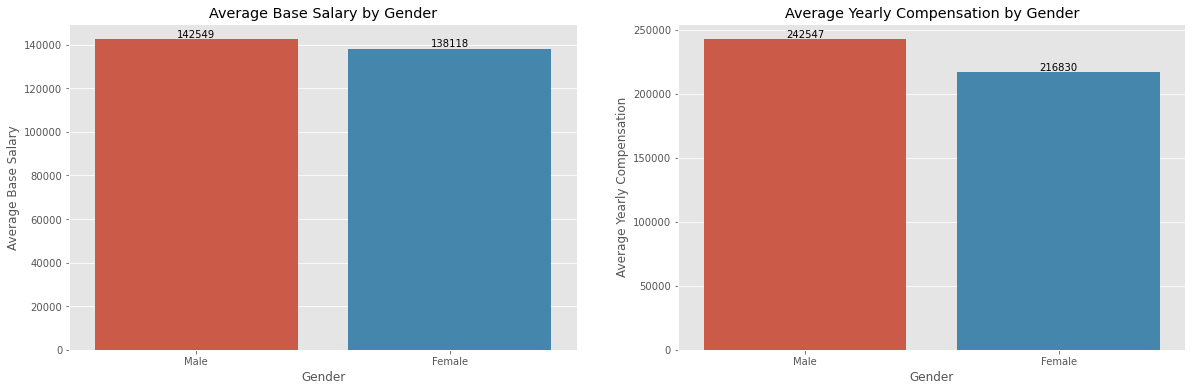

In [316]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,6))

sns.barplot(data = top10_gender, x = "gender", y = "basesalary", ax = ax[0], ci = None,
           order = top10_gender.groupby("gender")["basesalary"].mean().sort_values(ascending = False).index)
ax[0].set_title("Average Base Salary by Gender")
ax[0].set_ylabel("Average Base Salary")
ax[0].set_xlabel("Gender")
ax[0].bar_label(ax[0].containers[0], label_type='edge')


sns.barplot(data = top10_gender, x = "gender", y = "totalyearlycompensation", ax = ax[1], ci = None,
           order = top10_gender.groupby("gender")["totalyearlycompensation"].mean().sort_values(ascending = False).index)
ax[1].set_title("Average Yearly Compensation by Gender")
ax[1].set_ylabel("Average Yearly Compensation")
ax[1].set_xlabel("Gender")
ax[1].bar_label(ax[1].containers[0], label_type='edge')


plt.show()

#### Average Yearly Compensation and Base Salary by Race

In [243]:
top10_race = top10.loc[top10.Race.dropna().index]

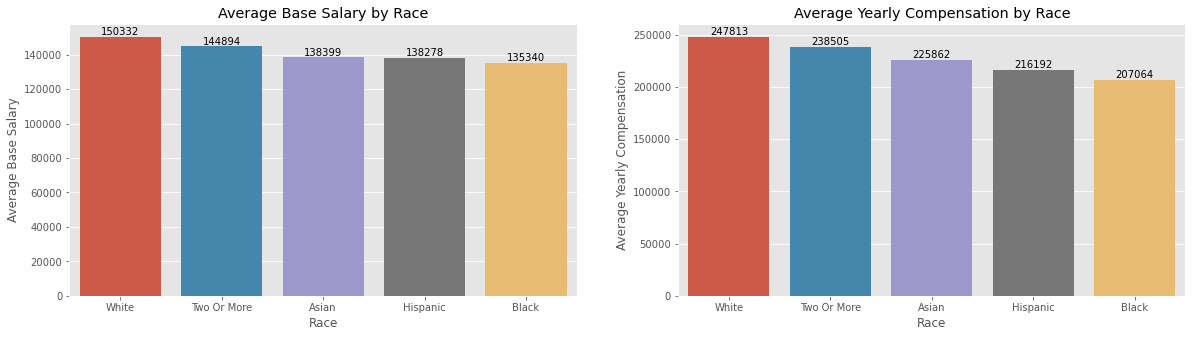

In [317]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

sns.barplot(data = top10_race, x = "Race", y = "basesalary", ax = ax[0], ci = None,
           order = top10_race.groupby("Race")["basesalary"].mean().sort_values(ascending = False).index)
ax[0].set_title("Average Base Salary by Race")
ax[0].set_ylabel("Average Base Salary")
ax[0].set_xlabel("Race")
ax[0].bar_label(ax[0].containers[0], label_type='edge')


sns.barplot(data = top10_race, x = "Race", y = "totalyearlycompensation", ax = ax[1], ci = None,
           order = top10_race.groupby("Race")["totalyearlycompensation"].mean().sort_values(ascending = False).index)
ax[1].set_title("Average Yearly Compensation by Race")
ax[1].set_ylabel("Average Yearly Compensation")
ax[1].set_xlabel("Race")
ax[1].bar_label(ax[1].containers[0], label_type='edge')


plt.show()

#### Average Base Salary and Yearly Compensation by Education

In [255]:
top10_educ = top10.loc[top10.Education.dropna().index]

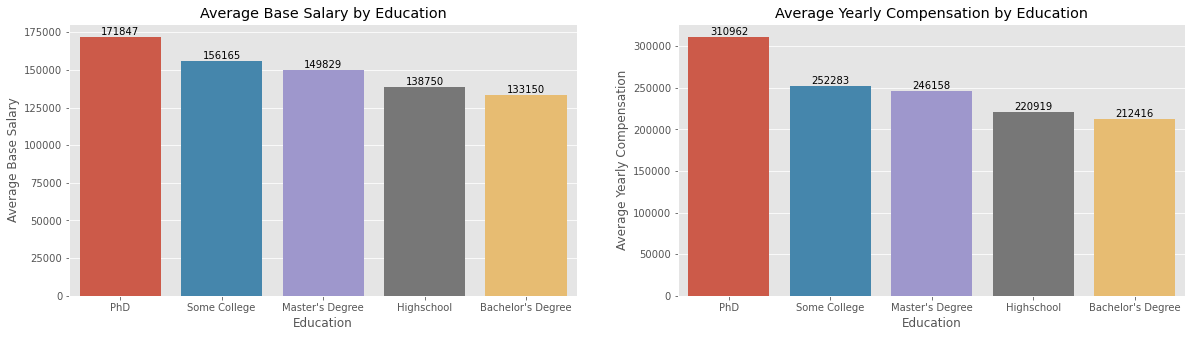

In [395]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

sns.barplot(data = top10_educ, x = "Education", y = "basesalary", ax = ax[0], ci = None,
           order = top10_educ.groupby("Education")["basesalary"].mean().sort_values(ascending = False).index)
ax[0].set_title("Average Base Salary by Education")
ax[0].set_ylabel("Average Base Salary")
ax[0].set_xlabel("Education")
ax[0].bar_label(ax[0].containers[0], label_type='edge')

sns.barplot(data = top10_educ, x = "Education", y = "totalyearlycompensation", ax = ax[1], ci = None,
           order = top10_educ.groupby("Education")["totalyearlycompensation"].mean().sort_values(ascending = False).index)
ax[1].set_title("Average Yearly Compensation by Education")
ax[1].set_ylabel("Average Yearly Compensation")
ax[1].set_xlabel("Education")
ax[1].bar_label(ax[1].containers[0], label_type='edge')

plt.show()

#### Average Base Salary and Yearly Compensation by Experience

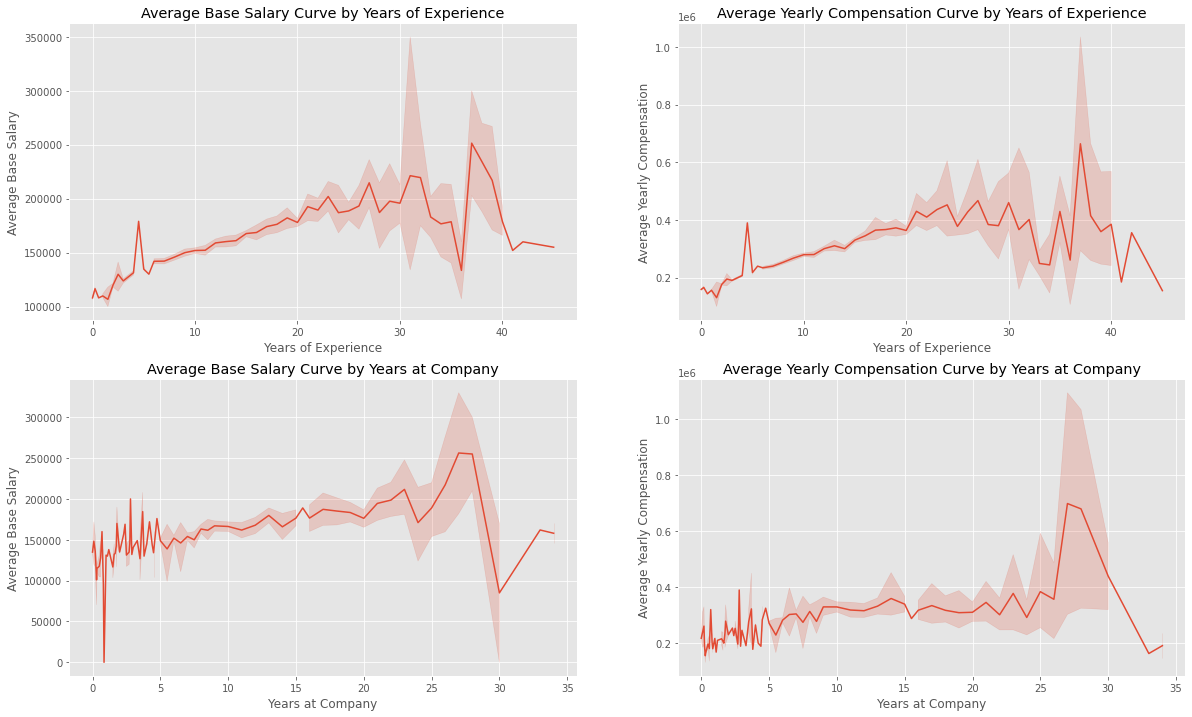

In [254]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (20,12))

sns.lineplot(data = top10, x = "yearsofexperience", y = "basesalary", ax = ax[0][0])
ax[0][0].set_title("Average Base Salary Curve by Years of Experience")
ax[0][0].set_ylabel("Average Base Salary")
ax[0][0].set_xlabel("Years of Experience")

sns.lineplot(data = top10, x = "yearsofexperience", y = "totalyearlycompensation", ax = ax[0][1])
ax[0][1].set_title("Average Yearly Compensation Curve by Years of Experience")
ax[0][1].set_ylabel("Average Yearly Compensation")
ax[0][1].set_xlabel("Years of Experience")

sns.lineplot(data = top10, x = "yearsatcompany", y = "basesalary", ax = ax[1][0])
ax[1][0].set_title("Average Base Salary Curve by Years at Company")
ax[1][0].set_ylabel("Average Base Salary")
ax[1][0].set_xlabel("Years at Company")

sns.lineplot(data = top10, x = "yearsatcompany", y = "totalyearlycompensation", ax = ax[1][1])
ax[1][1].set_title("Average Yearly Compensation Curve by Years at Company")
ax[1][1].set_ylabel("Average Yearly Compensation")
ax[1][1].set_xlabel("Years at Company")

plt.show()

### Average Years of Experience by Categorical Variables in Top 10 Companies

In [379]:
top10.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'cityid', 'Race', 'Education'],
      dtype='object')

#### Average Experience by Company

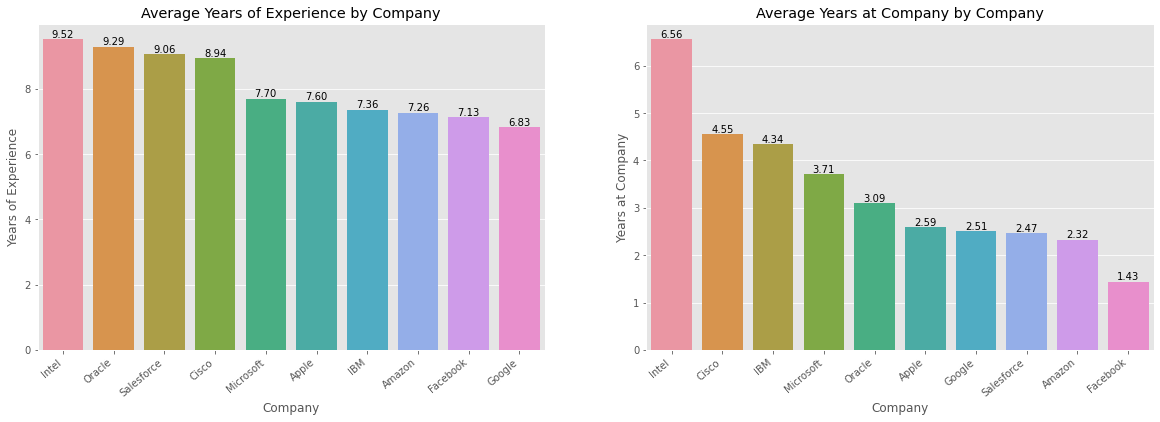

In [403]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,6))

sns.barplot(data = top10, x = "company", y = "yearsofexperience", ax = ax[0], ci = None,
           order = top10.groupby("company")["yearsofexperience"].mean().sort_values(ascending = False).index)
ax[0].set_title("Average Years of Experience by Company")
ax[0].set_xlabel("Company")
ax[0].set_ylabel("Years of Experience")
ax[0].set_xticklabels(top10.groupby("company")["yearsofexperience"].mean().sort_values(ascending = False).index,
                         rotation=40, ha="right")
ax[0].bar_label(ax[0].containers[0], label_type='edge', fmt = "%.2f")

sns.barplot(data = top10, x = "company", y = "yearsatcompany", ax = ax[1], ci = None,
           order = top10.groupby("company")["yearsatcompany"].mean().sort_values(ascending = False).index)
ax[1].set_title("Average Years at Company by Company")
ax[1].set_xlabel("Company")
ax[1].set_ylabel("Years at Company")
ax[1].set_xticklabels(top10.groupby("company")["yearsatcompany"].mean().sort_values(ascending = False).index,
                         rotation=40, ha="right")
ax[1].bar_label(ax[1].containers[0], label_type='edge', fmt = "%.2f")

plt.show()

#### Average Experience by Title

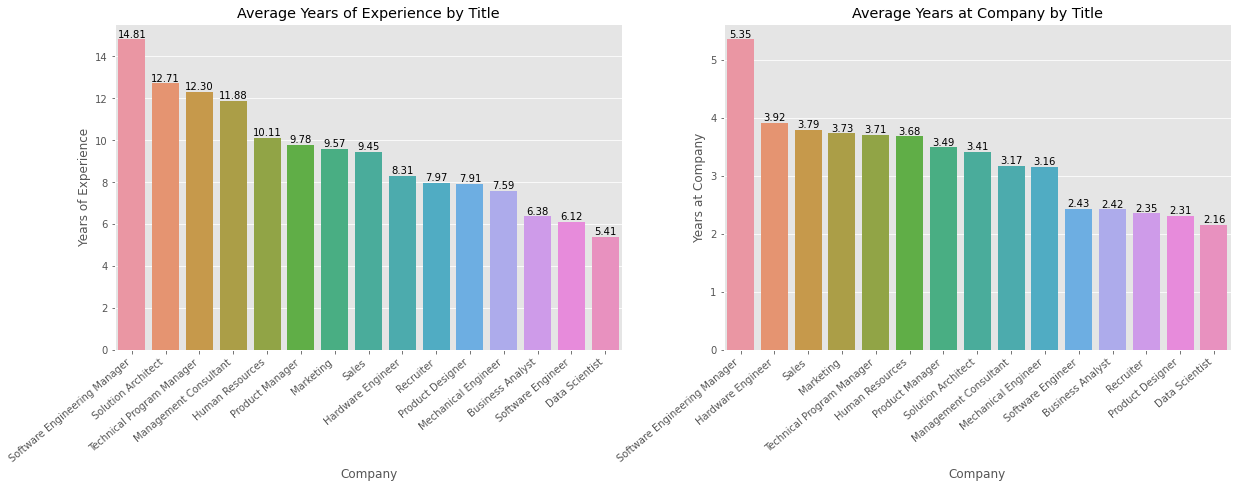

In [402]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,6))

sns.barplot(data = top10, x = "title", y = "yearsofexperience", ax = ax[0], ci = None,
           order = top10.groupby("title")["yearsofexperience"].mean().sort_values(ascending = False).index)
ax[0].set_title("Average Years of Experience by Title")
ax[0].set_xlabel("Company")
ax[0].set_ylabel("Years of Experience")
ax[0].set_xticklabels(top10.groupby("title")["yearsofexperience"].mean().sort_values(ascending = False).index,
                         rotation=40, ha="right")
ax[0].bar_label(ax[0].containers[0], label_type='edge', fmt = "%.2f")

sns.barplot(data = top10, x = "title", y = "yearsatcompany", ax = ax[1], ci = None,
           order = top10.groupby("title")["yearsatcompany"].mean().sort_values(ascending = False).index)
ax[1].set_title("Average Years at Company by Title")
ax[1].set_xlabel("Company")
ax[1].set_ylabel("Years at Company")
ax[1].set_xticklabels(top10.groupby("title")["yearsatcompany"].mean().sort_values(ascending = False).index,
                         rotation=40, ha="right")
ax[1].bar_label(ax[1].containers[0], label_type='edge', fmt = "%.2f")

plt.show()

### Differences in Total Yearly Compensation for Managers

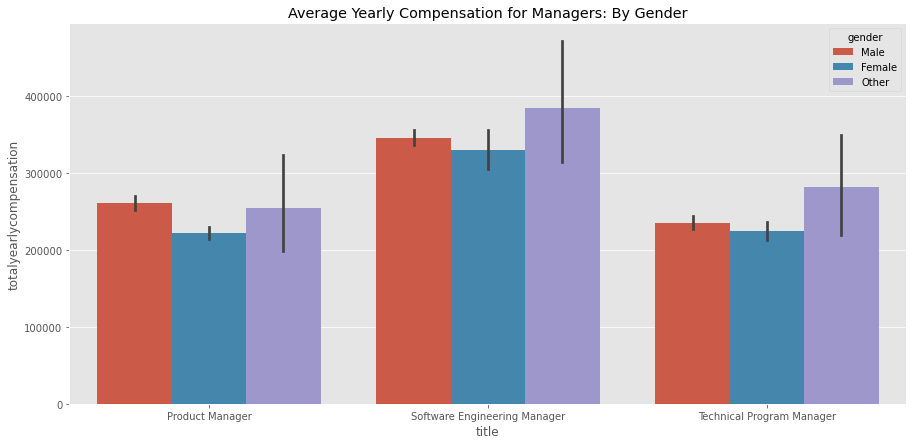

In [718]:
managers = top10.loc[top10.title.isin(['Product Manager', 'Software Engineering Manager',
                                       'Technical Program Manager'])]

fig, ax = plt.subplots(figsize = (15,7))

sns.barplot(data = managers, y = "totalyearlycompensation", x = "title", hue = "gender")
ax.set_title("Average Yearly Compensation for Managers: By Gender")

plt.show()

## Multivariate Graphs

In [257]:
top10.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'cityid', 'Race', 'Education'],
      dtype='object')

In [258]:
top10.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,cityid,Race,Education
1,6/4/2018 0:16:01,Oracle,M3,Software Engineering Manager,340000,"Redwood City, CA",16.0,15.0,Distributed Systems (Back-End),206000.0,134000.0,0.0,Male,7392,NaN,NaN
4,6/5/2018 12:44:52,Google,L3,Software Engineer,208000,"Mountain View, CA",0.0,0.0,Distributed Systems (Back-End),116000.0,65000.0,17000.0,Male,7322,NaN,NaN
5,6/5/2018 12:54:59,Amazon,L5,Software Engineer,240000,"Seattle, WA",5.5,5.5,Distributed Systems (Back-End),130000.0,110000.0,0.0,Male,11527,NaN,NaN
8,6/5/2018 13:21:08,Cisco,10,Software Engineer,165000,"Waltham, MA",10.0,1.0,API Development (Back-End),131000.0,15000.0,20000.0,Male,8893,NaN,NaN
9,6/5/2018 13:24:21,Cisco,Grade 10,Software Engineering Manager,132000,"Philadelphia, PA",7.0,2.0,DevOps,115000.0,0.0,15000.0,Male,10646,NaN,NaN


In [719]:
top10.Education.unique()

array([nan, 'PhD', "Master's Degree", "Bachelor's Degree", 'Some College',
       'Highschool'], dtype=object)

In [720]:
top10_educ.Education.unique()

array(['PhD', "Master's Degree", "Bachelor's Degree", 'Highschool',
       'Some College'], dtype=object)

### Base Salary Change by Year of Education and Education Degree

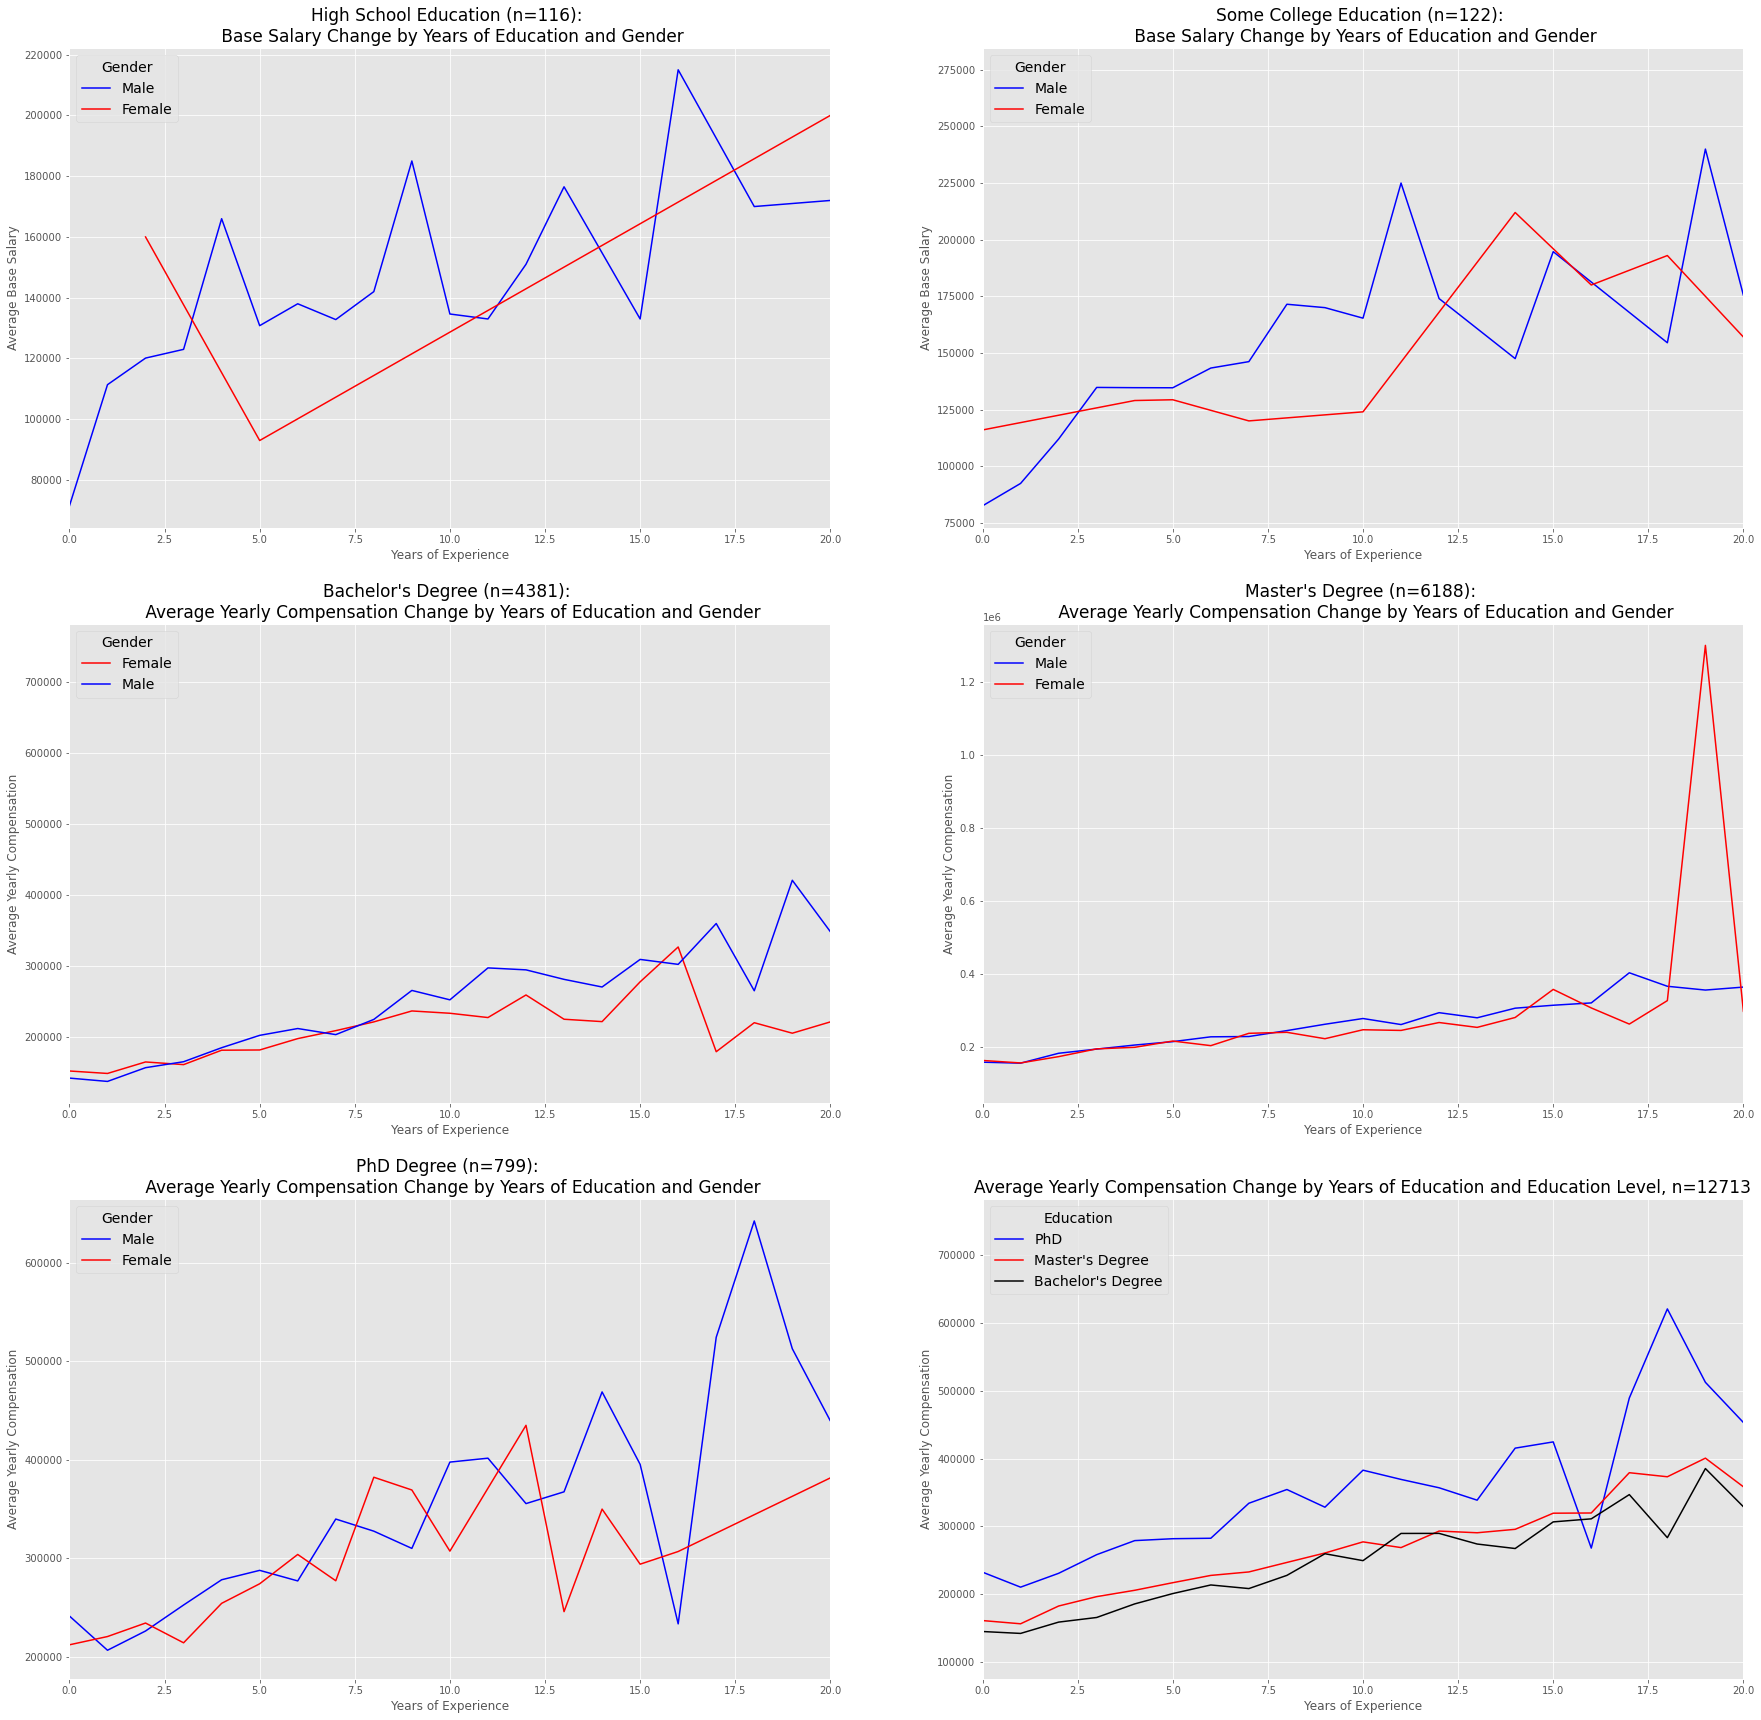

In [739]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (30,30))

top10_hs = top10_gender.loc[top10_gender.Education == "Highschool"]
sns.lineplot(data = top10_hs, y = "basesalary", x = "yearsofexperience", hue = "gender",
            ax = ax[0][0], ci = None, palette=['blue', 'red'])
ax[0][0].set_title(f"High School Education (n={top10_hs.shape[0]}): \n Base Salary Change by Years of Education and Gender",
                  fontsize = 17)
ax[0][0].set_xlabel("Years of Experience")
ax[0][0].set_ylabel("Average Base Salary")
leg = ax[0][0].legend(loc = 2, fontsize = 14, title = "Gender")
leg.get_title().set_fontsize('14')
ax[0][0].set_xlim(0,20)


top10_scol = top10_gender.loc[top10_gender.Education == "Some College"]
sns.lineplot(data = top10_scol, y = "basesalary", x = "yearsofexperience", hue = "gender",
            ax = ax[0][1], ci = None, palette=['blue', 'red'])
ax[0][1].set_title(f"Some College Education (n={top10_scol.shape[0]}): \n Base Salary Change by Years of Education and Gender",
                  fontsize = 17)
ax[0][1].set_xlabel("Years of Experience")
ax[0][1].set_ylabel("Average Base Salary")
leg = ax[0][1].legend(loc = 2, fontsize = 14, title = "Gender")
leg.get_title().set_fontsize('14')
ax[0][1].set_xlim(0,20)


top10_bsc = top10_gender.loc[top10_gender.Education == "Bachelor's Degree"]
sns.lineplot(data = top10_bsc, y = "totalyearlycompensation", x = "yearsofexperience", hue = "gender",
            ax = ax[1][0], ci = None, palette=['red', 'blue'])
ax[1][0].set_title(f"Bachelor's Degree (n={top10_bsc.shape[0]}): \n Average Yearly Compensation Change by Years of Education and Gender",
                  fontsize = 17)
ax[1][0].set_xlabel("Years of Experience")
ax[1][0].set_ylabel("Average Yearly Compensation")
leg = ax[1][0].legend(loc = 2, fontsize = 14, title = "Gender")
leg.get_title().set_fontsize('14')
ax[1][0].set_xlim(0,20)


top10_msc = top10_gender.loc[top10_gender.Education == "Master's Degree"]
sns.lineplot(data = top10_msc, y = "totalyearlycompensation", x = "yearsofexperience", hue = "gender",
            ax = ax[1][1], ci = None, palette=['blue', 'red'])
ax[1][1].set_title(f"Master's Degree (n={top10_msc.shape[0]}): \n Average Yearly Compensation Change by Years of Education and Gender",
                  fontsize = 17)
ax[1][1].set_xlabel("Years of Experience")
ax[1][1].set_ylabel("Average Yearly Compensation")
leg = ax[1][1].legend(loc = 2, fontsize = 14, title = "Gender")
leg.get_title().set_fontsize('14')
ax[1][1].set_xlim(0,20)


top10_phd = top10_gender.loc[top10_gender.Education == "PhD"]
sns.lineplot(data = top10_phd, y = "totalyearlycompensation", x = "yearsofexperience", hue = "gender",
            ax = ax[2][0], ci = None, palette=['blue', 'red'])
ax[2][0].set_title(f"PhD Degree (n={top10_phd.shape[0]}): \n Average Yearly Compensation Change by Years of Education and Gender",
                  fontsize = 17)
ax[2][0].set_xlabel("Years of Experience")
ax[2][0].set_ylabel("Average Yearly Compensation")
leg = ax[2][0].legend(loc = 2, fontsize = 14, title = "Gender")
leg.get_title().set_fontsize('14')
ax[2][0].set_xlim(0,20)


sns.lineplot(data = top10_educ_degree, y = "totalyearlycompensation", x = "yearsofexperience", hue = "Education",
            ax = ax[2][1], ci = None, palette=['blue', 'red','black'])
ax[2][1].set_title(f"Average Yearly Compensation Change by Years of Education and Education Level, n={top10_educ.shape[0]}",
                  fontsize = 17)
ax[2][1].set_xlabel("Years of Experience")
ax[2][1].set_ylabel("Average Yearly Compensation")
leg = ax[2][1].legend(loc = 2, fontsize = 14, title = "Education")
leg.get_title().set_fontsize('14')
ax[2][1].set_xlim(0,20)


plt.show()

In [737]:
top10.Race.unique()

array([nan, 'White', 'Asian', 'Black', 'Two Or More', 'Hispanic'],
      dtype=object)

In [758]:
top10_race.gender.unique()

array(['Female', 'Male', 'Other', nan], dtype=object)

In [818]:
def class_race(race):
    if race in ['Black', 'Two Or More', 'Hispanic']:
        return "Other"
    else:
        return race

top10_race["race2"] = top10_race.Race.apply(class_race)

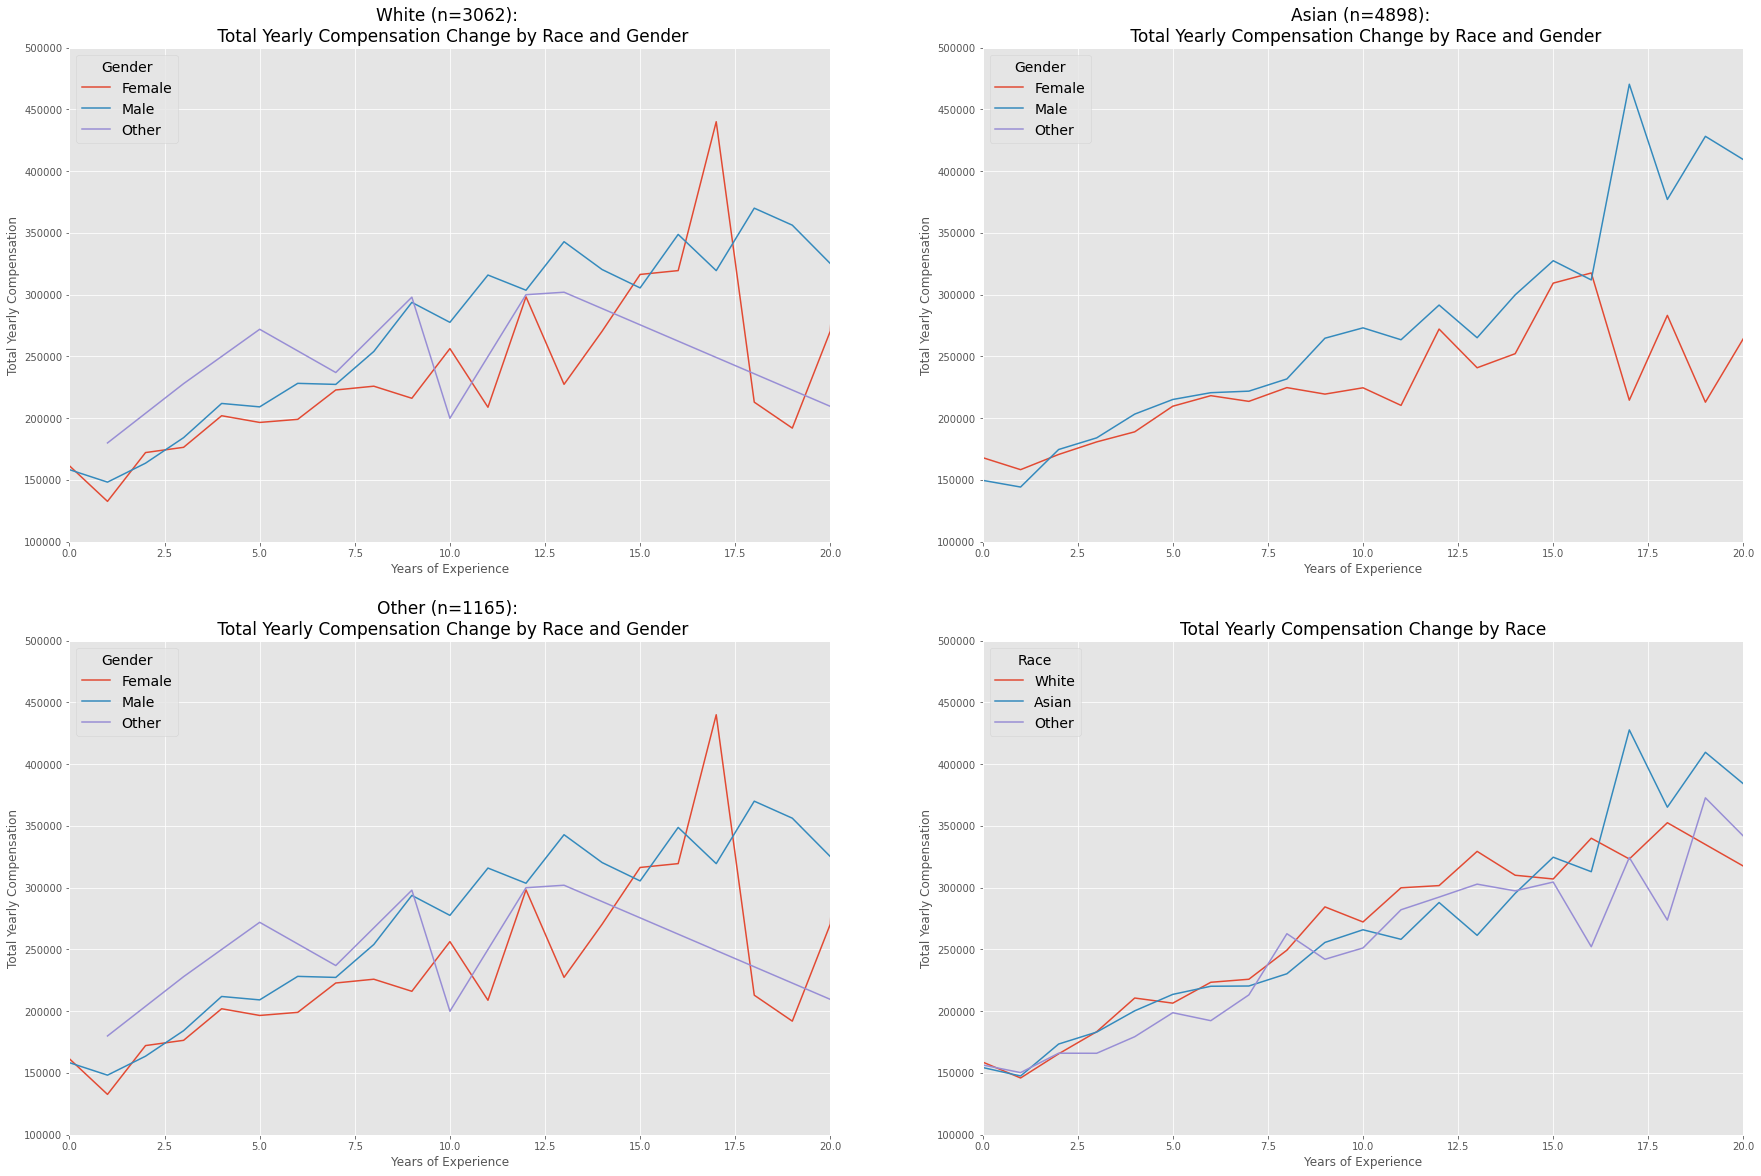

In [821]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (30,20))

top10_whi = top10_race.loc[top10_race.race2 == "White"]
sns.lineplot(data = top10_whi, y = "totalyearlycompensation", x = "yearsofexperience", hue = "gender",
            ax = ax[0][0], ci = None)
ax[0][0].set_title(f"White (n={top10_whi.shape[0]}): \n Total Yearly Compensation Change by Race and Gender",
                  fontsize = 17)
ax[0][0].set_xlabel("Years of Experience")
ax[0][0].set_ylabel("Total Yearly Compensation")
leg = ax[0][0].legend(loc = 2, fontsize = 14, title = "Gender")
leg.get_title().set_fontsize('14')
ax[0][0].set_xlim(0,20)
ax[0][0].set_ylim(100000,500000)

top10_asi = top10_race.loc[top10_race.race2 == "Asian"]
sns.lineplot(data = top10_asi, y = "totalyearlycompensation", x = "yearsofexperience", hue = "gender",
            ax = ax[0][1], ci = None)
ax[0][1].set_title(f"Asian (n={top10_asi.shape[0]}): \n Total Yearly Compensation Change by Race and Gender",
                  fontsize = 17)
ax[0][1].set_xlabel("Years of Experience")
ax[0][1].set_ylabel("Total Yearly Compensation")
leg = ax[0][1].legend(loc = 2, fontsize = 14, title = "Gender")
leg.get_title().set_fontsize('14')
ax[0][1].set_xlim(0,20)
ax[0][1].set_ylim(100000,500000)

top10_oth = top10_race.loc[top10_race.race2 == "Other"]
sns.lineplot(data = top10_whi, y = "totalyearlycompensation", x = "yearsofexperience", hue = "gender",
            ax = ax[1][0], ci = None)
ax[1][0].set_title(f"Other (n={top10_oth.shape[0]}): \n Total Yearly Compensation Change by Race and Gender",
                  fontsize = 17)
ax[1][0].set_xlabel("Years of Experience")
ax[1][0].set_ylabel("Total Yearly Compensation")
leg = ax[1][0].legend(loc = 2, fontsize = 14, title = "Gender")
leg.get_title().set_fontsize('14')
ax[1][0].set_xlim(0,20)
ax[1][0].set_ylim(100000,500000)


sns.lineplot(data = top10_race, y = "totalyearlycompensation", x = "yearsofexperience", hue = "race2",
            ax = ax[1][1], ci = None)
ax[1][1].set_title(f"Total Yearly Compensation Change by Race",
                  fontsize = 17)
ax[1][1].set_xlabel("Years of Experience")
ax[1][1].set_ylabel("Total Yearly Compensation")
leg = ax[1][1].legend(loc = 2, fontsize = 14, title = "Race")
leg.get_title().set_fontsize('14')
ax[1][1].set_xlim(0,20)
ax[1][1].set_ylim(100000,500000)




plt.show()

#### Base Salary Change by Years of Experience and Completed Degree

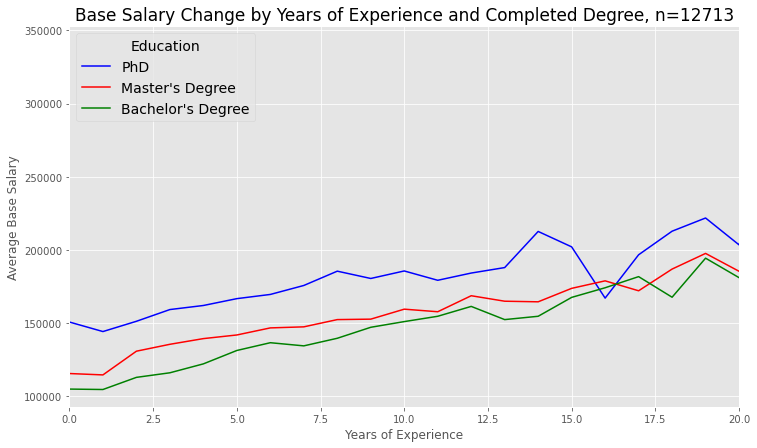

In [406]:
top10_educ_degree = top10_educ.loc[top10_educ.Education.isin(['PhD', "Master's Degree", "Bachelor's Degree"])]

fig,ax = plt.subplots(figsize = (12,7))

sns.lineplot(data = top10_educ_degree, y = "basesalary", x = "yearsofexperience", hue = "Education",
            ci = None, palette=['blue', 'red','green'])
ax.set_title(f"Base Salary Change by Years of Experience and Completed Degree, n={top10_educ.shape[0]}",
                  fontsize = 17)
ax.set_xlabel("Years of Experience")
ax.set_ylabel("Average Base Salary")
leg = ax.legend(loc = 2, fontsize = 14, title = "Education")
leg.get_title().set_fontsize('14')
ax.set_xlim(0,20)

plt.show()

## Salary Data for Data Scientists

In [462]:
ds = df.loc[df.title == "Data Scientist"]

In [693]:
ds.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
419,6/5/2018 14:06:30,LinkedIn,Senior,Data Scientist,233000,"San Francisco, CA",4.0,0.0,Data Analysis,162000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
440,6/8/2018 9:49:25,Microsoft,64,Data Scientist,218000,"Seattle, WA",11.0,11.0,ML / AI,165000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
444,6/8/2018 17:55:09,ebay,26,Data Scientist,180000,"San Jose, CA",10.0,5.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
454,6/10/2018 19:39:35,Twitter,Staff,Data Scientist,500000,"San Francisco, CA",4.0,4.0,ML / AI,200000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
495,6/17/2018 11:39:38,Facebook,5,Data Scientist,370000,"Seattle, WA",8.0,3.0,NaN,190000.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [464]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2578 entries, 419 to 62620
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                2578 non-null   object 
 1   company                  2578 non-null   object 
 2   level                    2572 non-null   object 
 3   title                    2578 non-null   object 
 4   totalyearlycompensation  2578 non-null   int64  
 5   location                 2578 non-null   object 
 6   yearsofexperience        2578 non-null   float64
 7   yearsatcompany           2578 non-null   float64
 8   tag                      2573 non-null   object 
 9   basesalary               2578 non-null   float64
 10  stockgrantvalue          2578 non-null   float64
 11  bonus                    2578 non-null   float64
 12  gender                   1740 non-null   object 
 13  otherdetails             1815 non-null   object 
 14  cityid               

### Most Popular Companies for Data Scientists

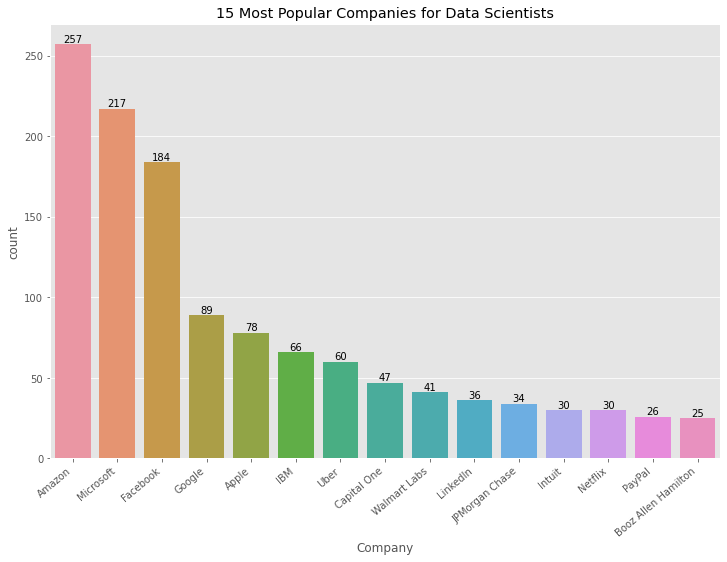

In [511]:
fig, ax = plt.subplots(figsize = (12,8))

sns.countplot(data = ds, x = "company",
             order = ds.company.value_counts().index[:15])
ax.set_title("15 Most Popular Companies for Data Scientists")
ax.set_xlabel("Company")
ax.set_xticklabels(ds.company.value_counts().index[:15],
                         rotation=40, ha="right")
ax.bar_label(ax.containers[0], label_type='edge')

plt.show()

### Most Popular Cities for Data Scientists

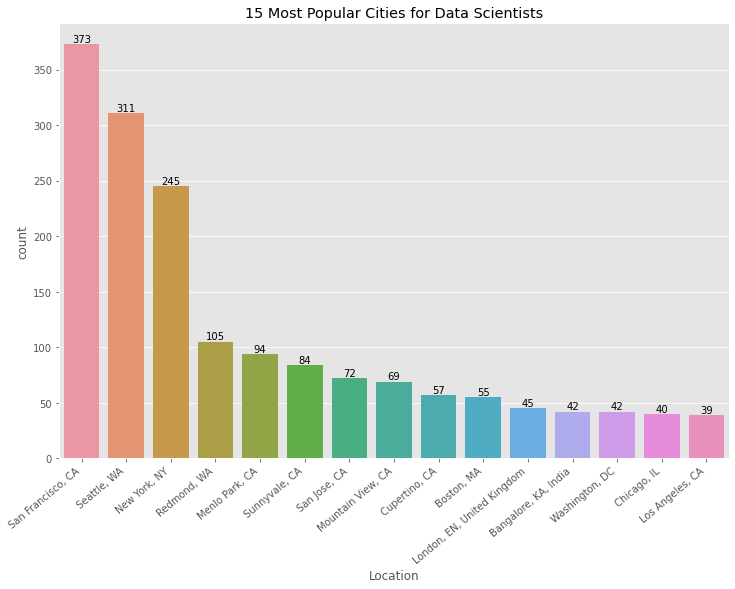

In [510]:
fig, ax = plt.subplots(figsize = (12,8))

sns.countplot(data = ds, x = "location",
             order = ds.location.value_counts().index[:15])
ax.set_title("15 Most Popular Cities for Data Scientists")
ax.set_xlabel("Location")
ax.set_xticklabels(ds.location.value_counts().index[:15],
                         rotation=40, ha="right")
ax.bar_label(ax.containers[0], label_type='edge')

plt.show()

### Average Salary for a Data Scientist

In [481]:
print(f"Average Base Salary for Data Scientists: ${round(ds.basesalary.mean(), 0)}")
print(f"Average Total Yearly Compensation for Data Scientists: ${round(ds.totalyearlycompensation.mean(),0)}")

Average Base Salary for Data Scientists: $138055.0
Average Total Yearly Compensation for Data Scientists: $203657.0


### Average Years of Experience for a Data Scientist

In [547]:
print(f"Average Years of Experience for Data Scientist: {round(ds.yearsofexperience.mean(),0)}")

Average Years of Experience for Data Scientist: 5.0


### Distribution of Compensation for Data Scientists

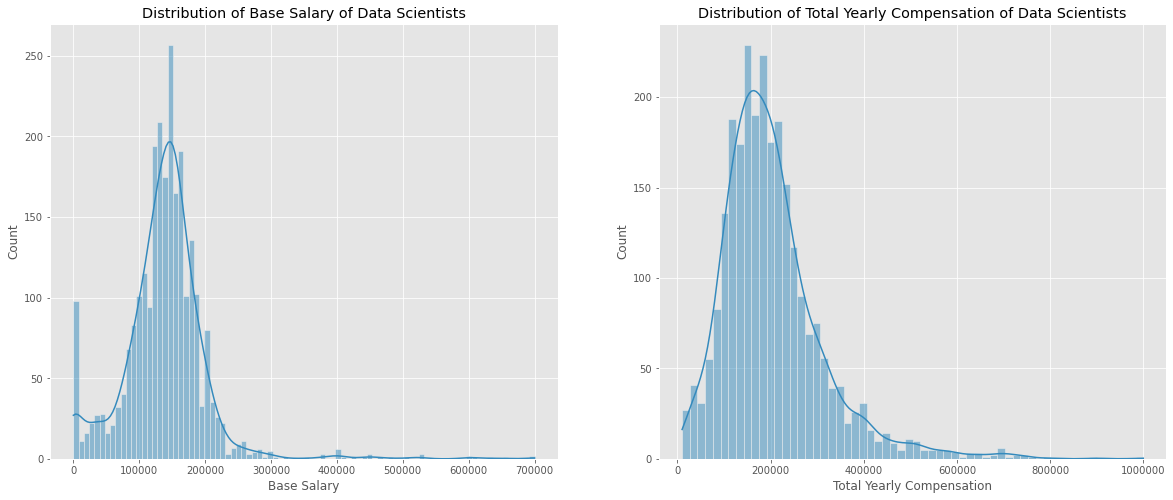

In [491]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8))

sns.histplot(data = ds, x = "basesalary", kde = True, ax = ax[0])
ax[0].set_title("Distribution of Base Salary of Data Scientists")
ax[0].set_xlabel("Base Salary")
ax[0].ticklabel_format(style = "plain")

sns.histplot(data = ds, x = "totalyearlycompensation", kde = True, ax = ax[1])
ax[1].set_title("Distribution of Total Yearly Compensation of Data Scientists")
ax[1].set_xlabel("Total Yearly Compensation")
ax[1].ticklabel_format(style = "plain")

plt.show()

Distribution right skewed

### Gender Among Data Scientists

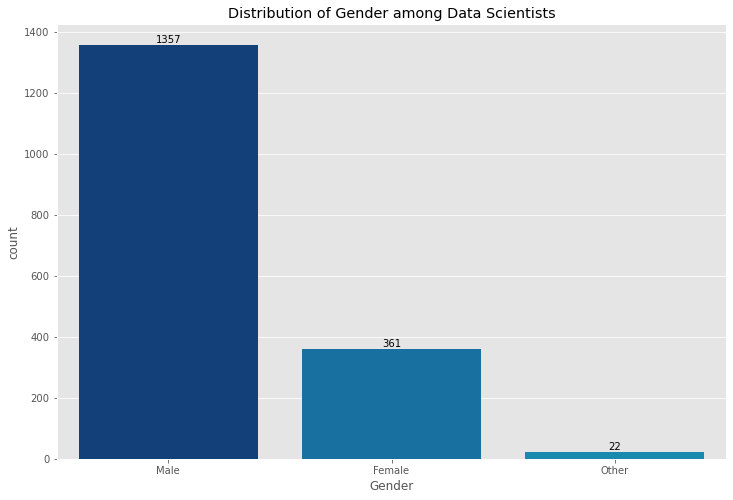

In [537]:
fig, ax = plt.subplots(figsize = (12,8))

sns.countplot(data = ds, x = "gender", palette = ["#023e8a","#0077b6","#0096c7"])
ax.set_title("Distribution of Gender among Data Scientists")
ax.set_xlabel("Gender")
ax.bar_label(ax.containers[0], label_type='edge')

plt.show()

#### Compensation for Data Scientists by Gender

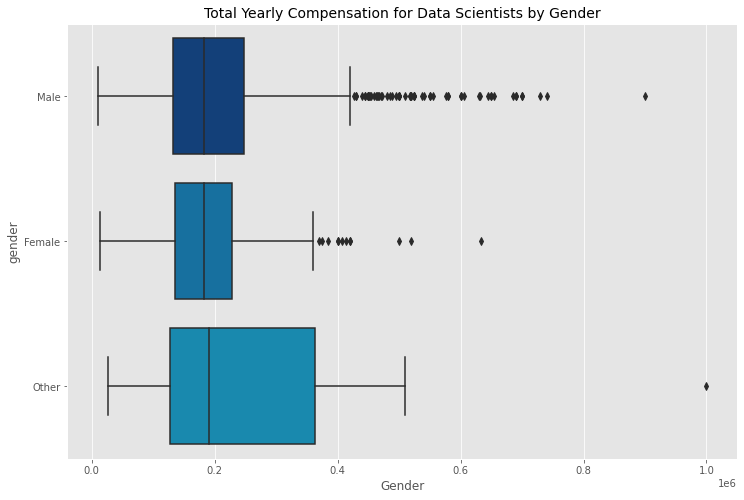

In [538]:
fig, ax = plt.subplots(figsize = (12,8))

sns.boxplot(data = ds, x = "totalyearlycompensation", y = "gender", orient = "h",
           palette = ["#023e8a","#0077b6","#0096c7"])
ax.set_title("Total Yearly Compensation for Data Scientists by Gender", fontsize = 14)
ax.set_xlabel("Gender")

plt.show()

### Distribution of Race among Data Scientists

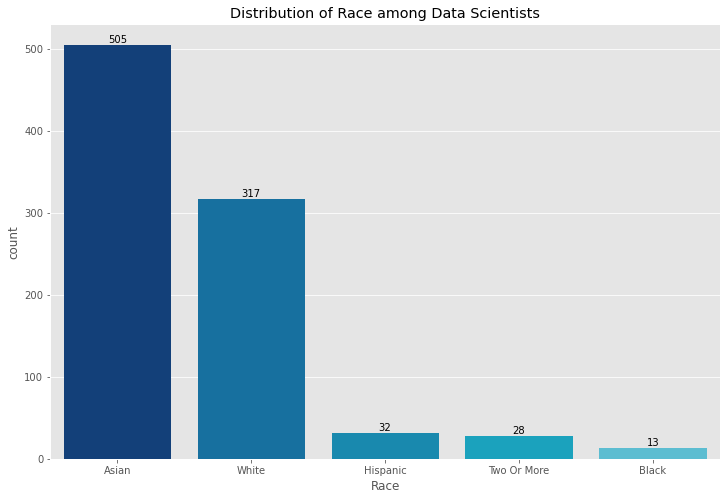

In [539]:
fig, ax = plt.subplots(figsize = (12,8))

sns.countplot(data = ds, x = "Race", palette = ["#023e8a","#0077b6","#0096c7","#00b4d8","#48cae4"],
             order = ds.Race.value_counts().index)
ax.set_title("Distribution of Race among Data Scientists")
ax.bar_label(ax.containers[0], label_type='edge')

plt.show()

#### Compensation for Data Scientists by Race

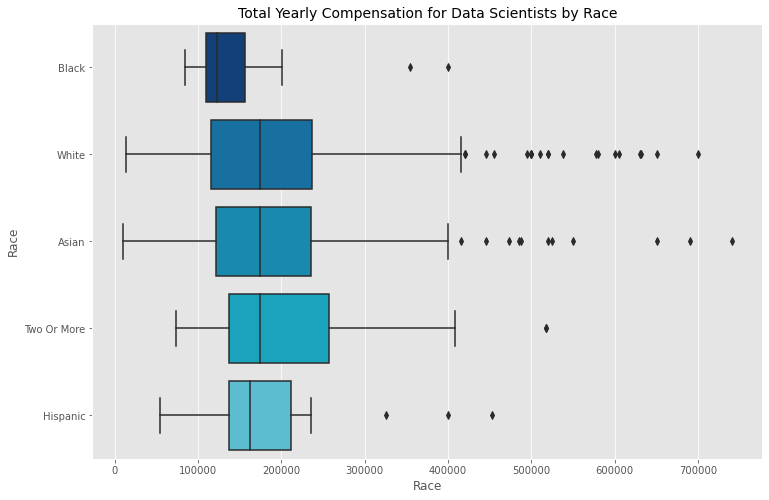

In [542]:
fig, ax = plt.subplots(figsize = (12,8))

sns.boxplot(data = ds, x = "totalyearlycompensation", y = "Race", orient = "h",
           palette = ["#023e8a","#0077b6","#0096c7","#00b4d8","#48cae4"])
ax.set_title("Total Yearly Compensation for Data Scientists by Race", fontsize = 14)
ax.set_xlabel("Race")

plt.show()

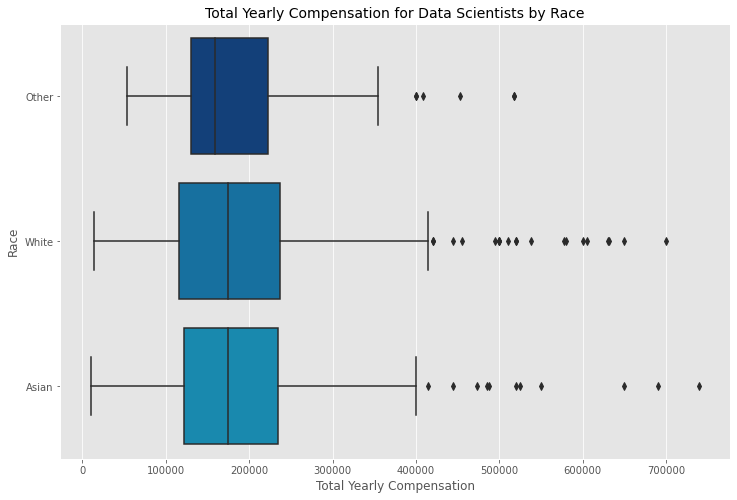

In [608]:
fig, ax = plt.subplots(figsize = (12,8))

sns.boxplot(data = ds_race, x = "totalyearlycompensation", y = "race2", orient = "h",
           palette = ["#023e8a","#0077b6","#0096c7","#00b4d8","#48cae4"])
ax.set_title("Total Yearly Compensation for Data Scientists by Race", fontsize = 14)
ax.set_xlabel("Total Yearly Compensation")
ax.set_ylabel("Race")

plt.show()

### Distribution of Education among Data Scientist

In [516]:
ds.Education.unique()

array([nan, 'PhD', "Master's Degree", "Bachelor's Degree", 'Highschool',
       'Some College'], dtype=object)

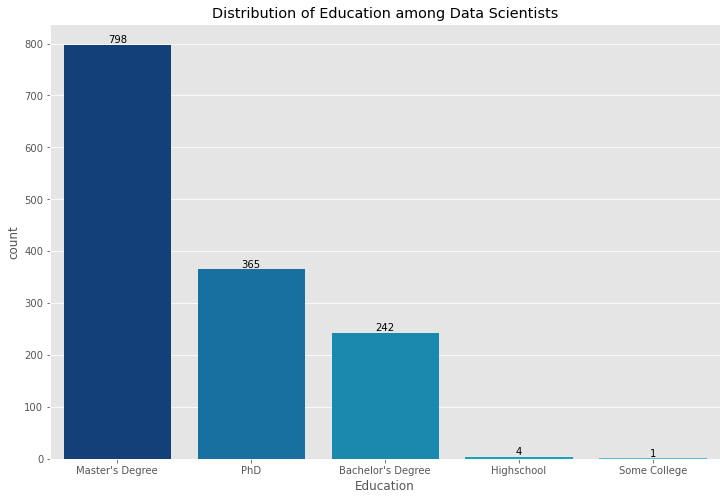

In [543]:
fig, ax = plt.subplots(figsize = (12,8))

sns.countplot(data = ds, x = "Education", palette = ["#023e8a","#0077b6","#0096c7","#00b4d8","#48cae4"],
             order = ds.Education.value_counts().index)
ax.set_title("Distribution of Education among Data Scientists")
ax.bar_label(ax.containers[0], label_type='edge')

plt.show()

#### Compensation for Data Scientists by Education

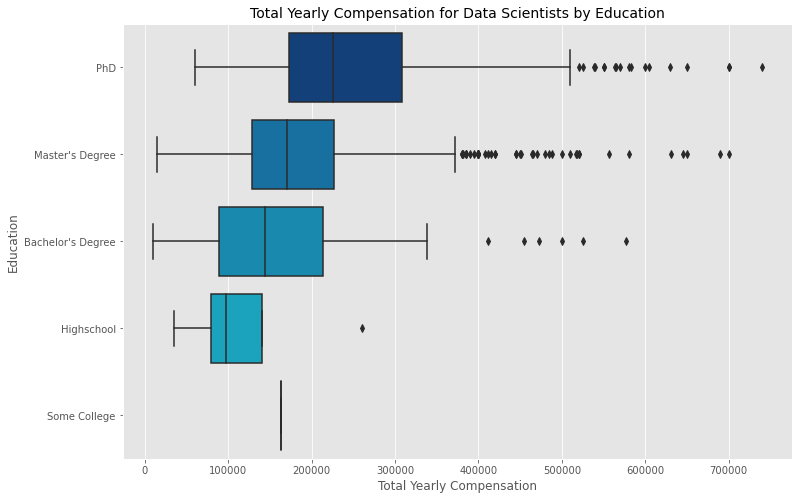

In [605]:
fig, ax = plt.subplots(figsize = (12,8))

sns.boxplot(data = ds, x = "totalyearlycompensation", y = "Education", orient = "h",
           palette = ["#023e8a","#0077b6","#0096c7","#00b4d8","#48cae4"])
ax.set_title("Total Yearly Compensation for Data Scientists by Education", fontsize = 14)
ax.set_xlabel("Total Yearly Compensation")

plt.show()

### Distribution of Years of Experience for Data Scientists

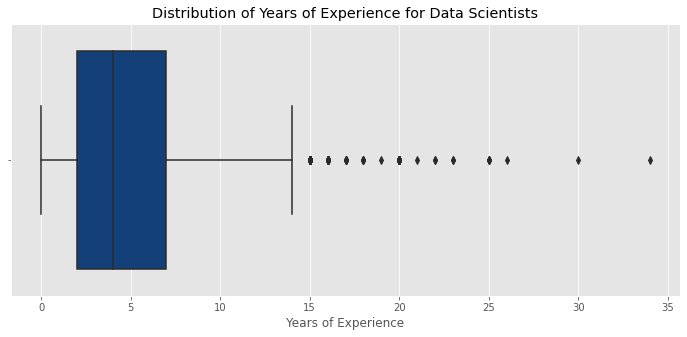

In [571]:
fig, ax = plt.subplots(figsize = (12,5))

sns.boxplot(data = ds, x = "yearsofexperience", palette = ["#023e8a"])
ax.set_title("Distribution of Years of Experience for Data Scientists")
ax.set_xlabel("Years of Experience")

plt.show()

### Average Yearly Compensation Change by Years of Experience for Data Scientists

In [548]:
ds.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

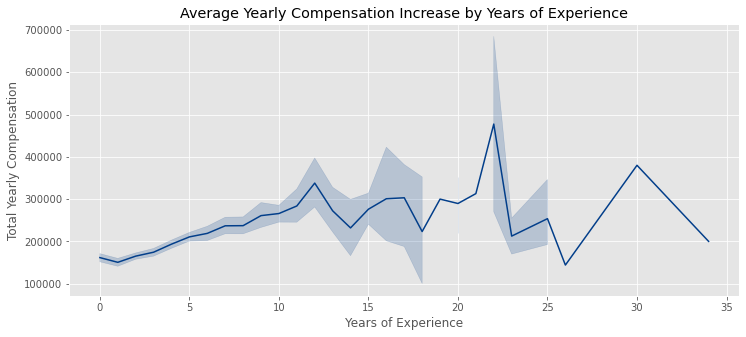

In [572]:
fig, ax = plt.subplots(figsize = (12,5))

sns.lineplot(data = ds, x = "yearsofexperience", y = "totalyearlycompensation", color = "#023e8a")
ax.set_title("Average Yearly Compensation Increase by Years of Experience")
ax.set_xlabel("Years of Experience")
ax.set_ylabel("Total Yearly Compensation")

plt.show()

#### Average Yearly Compensation Change by Years of Experience for Data Scientists by Gender

In [568]:
ds_gender = ds.loc[ds.gender.isin(["Male", "Female"])]

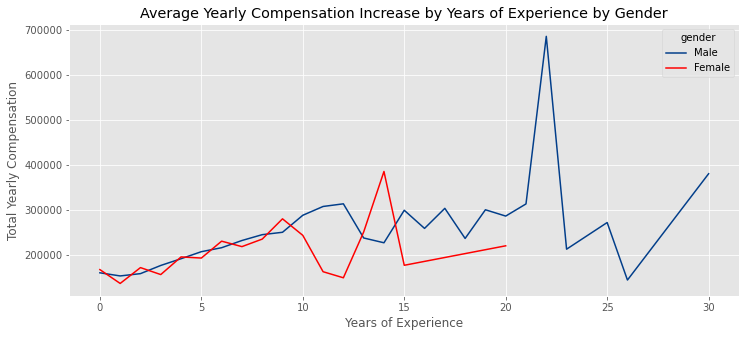

In [581]:
fig, ax = plt.subplots(figsize = (12,5))

sns.lineplot(data = ds_gender, x = "yearsofexperience", y = "totalyearlycompensation", hue = "gender", 
             palette = ["#023e8a", "red"], ci = None)
ax.set_title("Average Yearly Compensation Increase by Years of Experience by Gender")
ax.set_xlabel("Years of Experience")
ax.set_ylabel("Total Yearly Compensation")

plt.show()

#### Average Yearly Compensation Change by Years of Experience for Data Scientists by Education

In [577]:
ds.Education.unique()

array([nan, 'PhD', "Master's Degree", "Bachelor's Degree", 'Highschool',
       'Some College'], dtype=object)

In [578]:
ds.groupby("Education").size()

Education
Bachelor's Degree    242
Highschool             4
Master's Degree      798
PhD                  365
Some College           1
dtype: int64

In [579]:
ds_educ = ds.loc[ds.Education.isin(['PhD', "Master's Degree", "Bachelor's Degree"])]

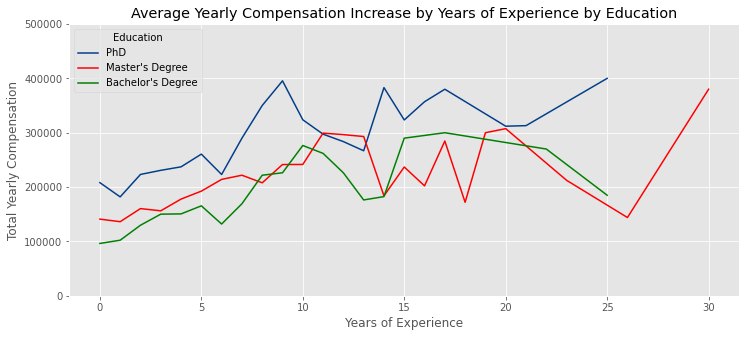

In [590]:
fig, ax = plt.subplots(figsize = (12,5))

sns.lineplot(data = ds_educ, x = "yearsofexperience", y = "totalyearlycompensation", hue = "Education", 
             palette = ["#023e8a", "red", "green"], ci = None)
ax.set_title("Average Yearly Compensation Increase by Years of Experience by Education")
ax.set_xlabel("Years of Experience")
ax.set_ylabel("Total Yearly Compensation")
ax.set_ylim(0,500000)

plt.show()

#### Average Yearly Compensation Change by Years of Experience for Data Scientists by Race

In [591]:
ds.Race.unique()

array([nan, 'Black', 'White', 'Asian', 'Two Or More', 'Hispanic'],
      dtype=object)

In [592]:
ds.groupby("Race").size()

Race
Asian          505
Black           13
Hispanic        32
Two Or More     28
White          317
dtype: int64

In [598]:
ds_race = ds.loc[ds.Race.isin(['Black', 'White', 'Asian', 'Two Or More', 'Hispanic'])]

In [599]:
def group_race(race):
    if race == "White":
        return "White"
    elif race == "Asian":
        return "Asian"
    else:
        return "Other"
    
ds_race["race2"] = ds_race.Race.apply(group_race)

/var/folders/f2/gy3wvk2x3t36m50bbjptxdb80000gn/T/ipykernel_94330/524439896.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_race["race2"] = ds_race.Race.apply(group_race)


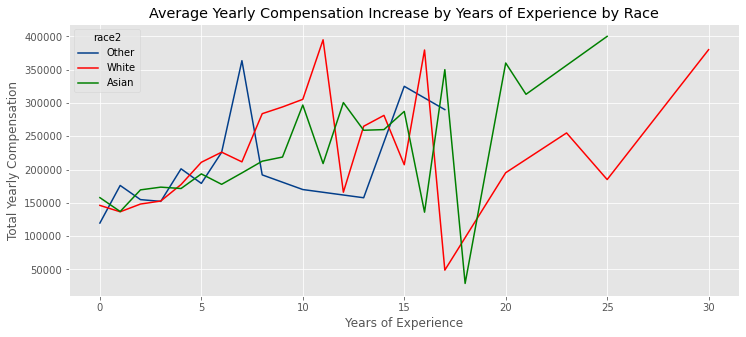

In [602]:
fig, ax = plt.subplots(figsize = (12,5))

sns.lineplot(data = ds_race, x = "yearsofexperience", y = "totalyearlycompensation", hue = "race2", 
             palette = ["#023e8a", "red", "green"], ci = None)
ax.set_title("Average Yearly Compensation Increase by Years of Experience by Race")
ax.set_xlabel("Years of Experience")
ax.set_ylabel("Total Yearly Compensation")

plt.show()